# Comparison of parameters for jet tagging in fast sim and full sim

Here I use CLD also for FastSim and use more data for FullSim for better statistics


In [30]:
save_status = False # save all histograms!

In [31]:
import uproot 
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
#path_CLDllsim = "/home/saaumill/FullSimTagger/src/Hbb_CLDllsim_tree.root"
path_IDEAstsimCLD = "/eos/experiment/fcc/ee/jet_flavour_tagging/winter2023/samples_v6/training/Hgg.root" #CLD
path_IDEAstsimIDEA = "/eos/experiment/fcc/ee/jet_flavour_tagging/winter2023/samples_v2/stage2_Hgg.root" #IDEA

file_CLD = uproot.open(path_IDEAstsimCLD)
tree_CLD = file_CLD["tree;1"]

file_IDEA = uproot.open(path_IDEAstsimIDEA)
tree_IDEA = file_IDEA["tree;1"]

In [33]:
df_IDEA = tree_IDEA.arrays(library="np", entry_start=0, entry_stop=15000) #entry_start=0, entry_stop=200, 
df_CLD = tree_CLD.arrays(library="np", entry_start=0, entry_stop=15000)

In [34]:
df_IDEA.keys()


dict_keys(['recojet_isG', 'recojet_isU', 'recojet_isD', 'recojet_isS', 'recojet_isC', 'recojet_isB', 'recojet_isTAU', 'jet_p', 'jet_e', 'jet_mass', 'jet_phi', 'jet_theta', 'jet_nconst', 'jet_nmu', 'jet_nel', 'jet_nchad', 'jet_ngamma', 'jet_nnhad', 'jet_npfcand', 'pfcand_erel_log', 'pfcand_thetarel', 'pfcand_phirel', 'pfcand_dptdpt', 'pfcand_detadeta', 'pfcand_dphidphi', 'pfcand_dxydxy', 'pfcand_dzdz', 'pfcand_dxydz', 'pfcand_dphidxy', 'pfcand_dlambdadz', 'pfcand_dxyc', 'pfcand_dxyctgtheta', 'pfcand_phic', 'pfcand_phidz', 'pfcand_phictgtheta', 'pfcand_cdz', 'pfcand_cctgtheta', 'pfcand_mtof', 'pfcand_dndx', 'pfcand_charge', 'pfcand_isMu', 'pfcand_isEl', 'pfcand_isChargedHad', 'pfcand_isGamma', 'pfcand_isNeutralHad', 'pfcand_type', 'pfcand_dxy', 'pfcand_dz', 'pfcand_btagSip2dVal', 'pfcand_btagSip2dSig', 'pfcand_btagSip3dVal', 'pfcand_btagSip3dSig', 'pfcand_btagJetDistVal', 'pfcand_btagJetDistSig', 'pfcand_e', 'pfcand_p', 'pfcand_theta', 'pfcand_phi'])

In [35]:
print(np.sum(df_IDEA["jet_nconst"])) #/ np.sum(df_IDEA["jet_nconst"]) )
print(np.sum(df_CLD["jet_nconst"])) #/ np.sum(df_CLD["jet_nconst"]) )

555875.0
535794.0


In [36]:
print(np.sum(df_IDEA["jet_nnhad"])) #/ np.sum(df_IDEA["jet_nconst"]) )
print(np.sum(df_CLD["jet_nnhad"])) #/ np.sum(df_CLD["jet_nconst"]) )

25385.0
32229.0


In [37]:
print(np.sum(df_IDEA["jet_nel"]) )
print(np.sum(df_CLD["jet_nel"]) )

368.0
375.0


In [38]:
print(np.sum(df_IDEA["jet_ngamma"]) )
print(np.sum(df_CLD["jet_ngamma"]) )

269284.0
269528.0


In [39]:
print(np.sum(df_IDEA["jet_nel"]) / np.sum(df_IDEA["jet_nconst"]) )
print(np.sum(df_CLD["jet_nel"]) / np.sum(df_CLD["jet_nconst"]) )

0.00066201936
0.00069989584


In [40]:
print(np.sum(df_IDEA["jet_nmu"]) / np.sum(df_IDEA["jet_nconst"]) )
print(np.sum(df_CLD["jet_nmu"]) / np.sum(df_CLD["jet_nconst"]) )

0.00030222622
0.0004218039


In [41]:
print(np.sum(df_IDEA["jet_nchad"])) #/ np.sum(df_IDEA["jet_nconst"]) )
print(np.sum(df_CLD["jet_nchad"])) #/ np.sum(df_CLD["jet_nconst"]) )

260670.0
233436.0


In [42]:
def histograms(keys, n, k, figsize=(13, 2), bins=50, r=None, conc=False, save=False, path=None):
    fig, axs = plt.subplots(n, k, figsize=figsize)
    
    for i, ax in enumerate(axs.flat):
        ax.set_title(keys[i])
        ax.grid()
        # set same range if not specified
        if r == None:
            try:
                fa = df_IDEA[keys[i]]
                fu = df_CLD[keys[i]]
                combined_min = min(fa.min(), fu.min())
                combined_max = max(fa.max(), fu.max())
                combined_range = (combined_min, combined_max)
            except ValueError:
                fa = np.concatenate(df_IDEA[keys[i]])
                fu = np.concatenate(df_CLD[keys[i]])
                combined_min = min(fa.min(), fu.min())
                combined_max = max(fa.max(), fu.max())
                combined_range = (combined_min, combined_max)
        else:
            combined_range = r[keys[i]]
        # plot
        if conc==False:
            ax.hist(df_IDEA[keys[i]], bins=bins, range=combined_range, label='FastSim', histtype='step', linewidth=2.0, density=True) # set density=True to normalize
            ax.hist(df_CLD[keys[i]], bins=bins, range=combined_range, label='FullSim', histtype='step', linewidth=2.0, density=True)
        else: 
            ax.hist(np.concatenate(df_IDEA[keys[i]]), bins=bins, range=combined_range, histtype='step', linewidth=2.0, label='FastSim', density=True) # set density=True to normalize
            ax.hist(np.concatenate(df_CLD[keys[i]]), bins=bins, range=combined_range, histtype='step', linewidth=2.0, label='FullSim', density=True)
    
    plt.legend()
    plt.tight_layout()
    if save:
        if path==None:
            path = './hist-Hbb-15k/histogram.pdf'
        plt.savefig(path)

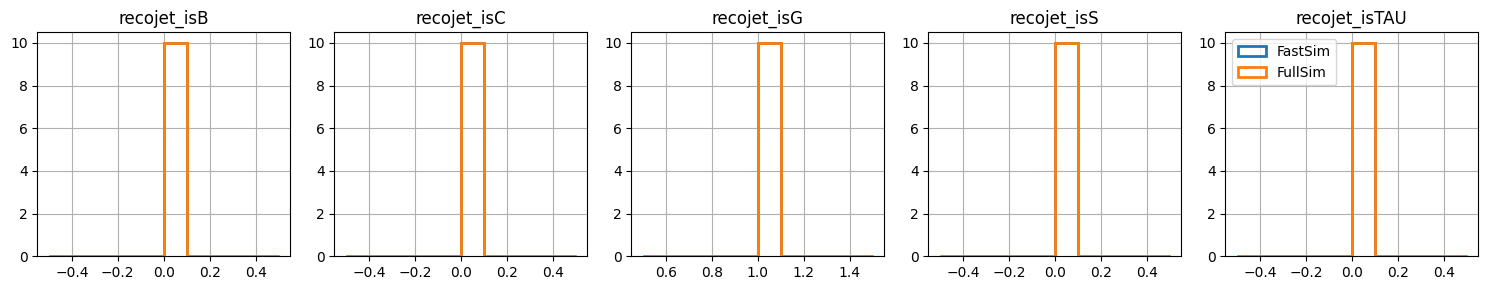

In [43]:
keys = ['recojet_isB',
 'recojet_isC',
 #'recojet_isD',
 'recojet_isG',
 'recojet_isS',
 'recojet_isTAU',
 #'recojet_isU'
]

histograms(keys, 1, 5, figsize=(15, 3), bins=10)

Aparrently FastSim has no isD and isU ...

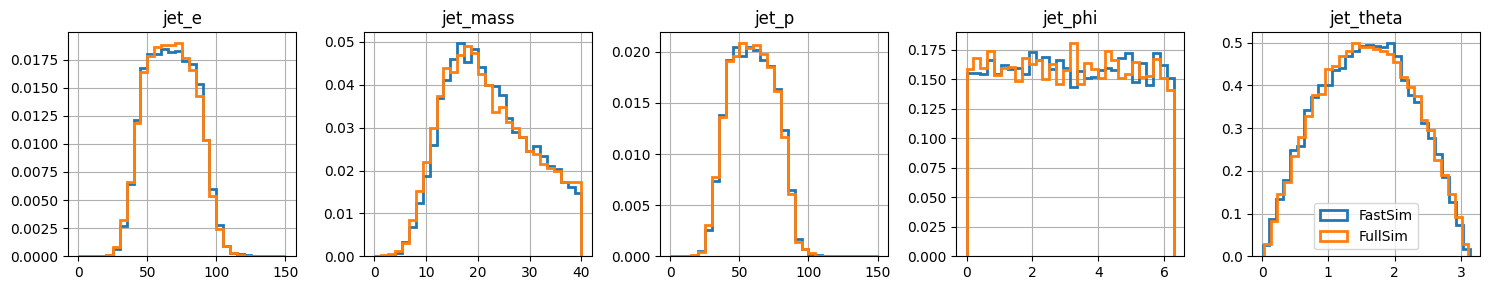

In [44]:
keys = ['jet_e',
 'jet_mass',
 'jet_p',
 'jet_phi',
 'jet_theta']

ranges = {
    'jet_e': (0, 150),
    'jet_mass': (0, 40),
    'jet_p': (0, 150),
    'jet_phi': None,
    'jet_theta': None
}


histograms(keys, 1, 5, figsize=(15, 3), r=ranges, bins=30, save=save_status, path='./hist-Hbb-15k/jet_properties.pdf')

- `jet_e` seems fine
- `jet_mass` seems fine
- `jet_p` seems fine
- `jet_phi` seems fine -> only other range! $\phi_{\mathrm{FullSim}} \in [-\pi, \pi]$ but $\phi_{\mathrm{FastSim}} \in [0, 2\pi]$
- `jet_theta` seems fine


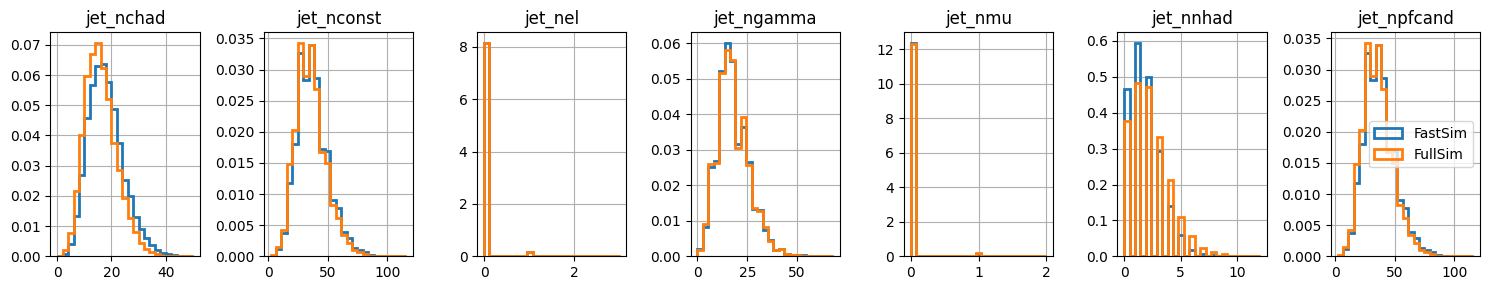

In [45]:
keys = ['jet_nchad',
 'jet_nconst',
 'jet_nel',
 'jet_ngamma',
 'jet_nmu',
 'jet_nnhad',
 'jet_npfcand']

histograms(keys, 1, 7, figsize=(15, 3), bins=25, save=save_status, path='./hist-Hbb-15k/jet_multiplicities.pdf')

Reasonable enough?
-> more neutral hadrons than with fast sim... this should be fine as full sim just includes more "trash"

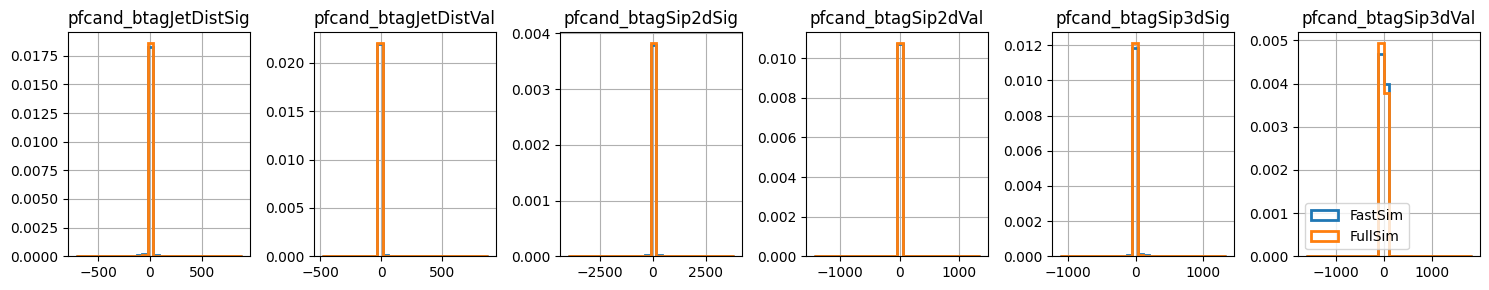

In [46]:
keys = ['pfcand_btagJetDistSig',
 'pfcand_btagJetDistVal',
 'pfcand_btagSip2dSig',
 'pfcand_btagSip2dVal',
 'pfcand_btagSip3dSig',
 'pfcand_btagSip3dVal']

histograms(keys, 1, 6, figsize=(15, 3), bins=30, conc=True)

Okay, Michele said that I should always compare the particles in a jet with the highest amount of energy and not the whole distribution because it might differ in the tails. So let's do that instead:

In [47]:
def get_index_highest_energy_particle(df, k=3):
    l = 0
    try:
        if df == 'fa':
            particles_e = df_IDEA['pfcand_e']
        elif df == 'fu':
            particles_e = df_CLD['pfcand_e']
        index = np.zeros((particles_e.shape[0], k), dtype=int)
        for i  in range(particles_e.shape[0]):
            part_e = particles_e[i]
            ind = np.argpartition(part_e, -k)[-k:]
            ind = ind[np.argsort(part_e[ind])[::-1]]
            index[i] = ind
    except ValueError:
        l += 1
        if df == 'fa':
            particles_e = df_IDEA['pfcand_e']
        elif df == 'fu':
            particles_e = df_CLD['pfcand_e']
        index = np.zeros((particles_e.shape[0], k), dtype=int)
        print("particle shape", particles_e.shape[0])
    print("l", l)
    return index

In [48]:
index_IDEA = get_index_highest_energy_particle("IDEA")
index_CLD = get_index_highest_energy_particle("CLD")

l 0
particle shape 15000
l 1


In [49]:
# Access the desired elements
def get_elements(df_value, index):
    return np.array([df_value[i][index[i]] for i in range(len(df_value))])


There are so many outliner, quite hard to compare...

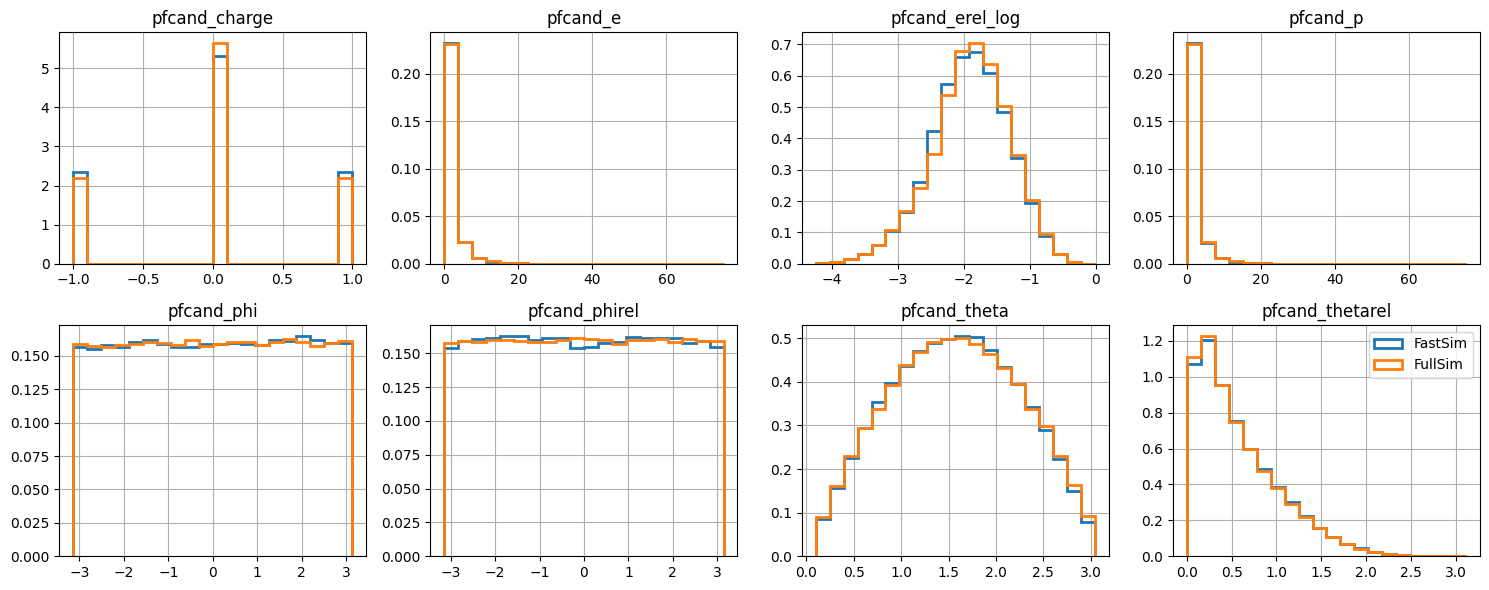

In [50]:
keys= [ 'pfcand_charge',
 'pfcand_e',
 'pfcand_erel_log',
 'pfcand_p',
 'pfcand_phi',
 'pfcand_phirel',
 'pfcand_theta',
 'pfcand_thetarel']

histograms(keys, 2, 4, figsize=(15, 6), bins=20, conc=True)

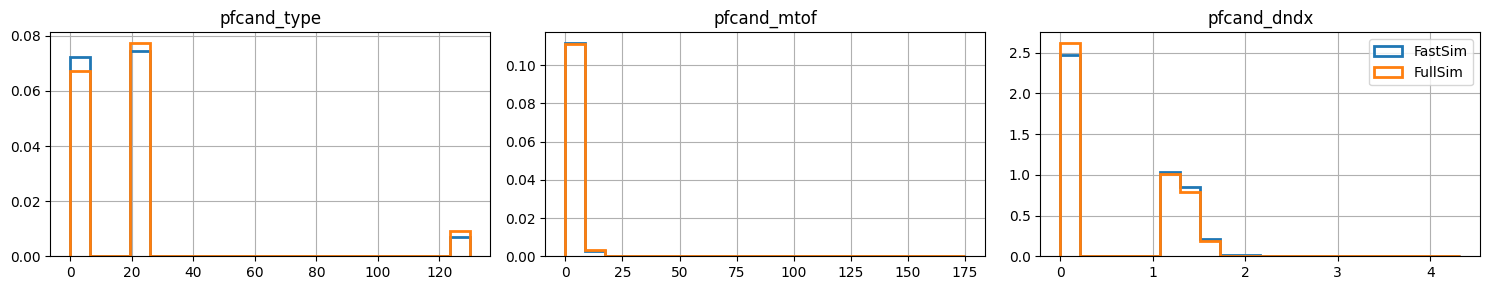

In [51]:
keys = ['pfcand_type', 'pfcand_mtof', 'pfcand_dndx']

histograms(keys, 1, 3, figsize=(15, 3), bins=20, conc=True)

In [52]:
from collections import defaultdict

In [53]:
def count_values(arrays, flatten=True):
    count_dict = defaultdict(int)
    
    # Flatten the array of arrays
    if flatten:
        flattened = np.concatenate(arrays)
    else:
        flattened = arrays
    
    # Count each value in the flattened array
    for value in flattened:
        count_dict[value] += 1
    
    return dict(count_dict)

In [54]:
count_values(df_IDEA['pfcand_type'])

{0.0: 261206, 22.0: 269284, 130.0: 25385}

0 means charged (electrons, myons, charged hadrons)

22 photons

130 neutral hadrons

In [55]:
count_values(df_CLD['pfcand_type'])

{0.0: 234037, 22.0: 269528, 130.0: 32229}

In [56]:
np.sum(df_CLD['jet_nnhad']) #543

32229.0

In [57]:
np.sum(df_CLD['jet_nchad']) #883 + 896 = 1779 check

233436.0

### Let's calculate some purity for FullSim

We have `pfcand_type` which is reco PID and we have `pfcand_MCPID` which is MC truth. Let's check how often they match.

In [58]:
count_values(df_CLD['pfcand_MCPID'])

KeyError: 'pfcand_MCPID'

In [ ]:
translation = {321: 211,-321: -211, 130:2112, -2112: 2112, 2212: 211, -2212: -211, 3222: 211, 3122: 2112}

mcPID = np.concatenate(df_CLD['pfcand_MCPID'])
recoPID = np.concatenate(df_CLD['pfcand_type'])

# Vectorized translation function
translate = np.vectorize(lambda x: translation.get(x, x))
mcPID= translate(mcPID)

**Efficiency** 
- How many MC V0 are identified correctly?
- = Correctly identified reconstructed V0/all MC V0

**Purity**
- How many reconstructed V0 are MC V0?
- = Correctly identified reconstructed V0/ all reconstructed V0

**THE FOLLOWING CALCULATION IS NOT CORRECT** 

Why? Because I don't sum over all MC particles, I just say there are as many as reco which is wrong. 

In [ ]:

# Function to calculate overall similarity
def calculate_similarity(mcPID, recoPID):
    if len(mcPID) != len(recoPID):
        raise ValueError("Arrays must be of the same length")
    
    # Calculate overall similarity
    overall_similarity = np.sum(mcPID == recoPID) / len(mcPID) * 100

    # Calculate similarity for each unique number
    unique_numbers = np.unique(mcPID)
    similarity_per_number = {}
    
    for number in unique_numbers:
        mc_indices = mcPID == number
        reco_indices = recoPID == number
        similarity_per_number[number] = np.sum(mc_indices & reco_indices) / np.sum(mc_indices) * 100

    return overall_similarity, similarity_per_number

# Calculate similarities
overall_similarity, similarity_per_number = calculate_similarity(mcPID, recoPID)

print(f"Overall Efficiency: {overall_similarity:.2f}%")
print("Efficiency per PID:")
for number, similarity in similarity_per_number.items():
    if number!=-999:
        print(f"{number}: {similarity:.2f}%")

Overall Efficiency: 78.98%
Efficiency per PID:
-3334: 0.00%
-3322: 0.00%
-3312: 0.00%
-3222: 0.00%
-3122: 0.00%
-3112: 0.00%
-211: 81.08%
-13: 45.13%
-11: 19.35%
11: 18.47%
13: 41.75%
22: 98.15%
211: 79.66%
310: 0.00%
2112: 87.06%
3112: 0.00%
3312: 0.00%
3334: 0.00%
1000010020: 0.00%
1000010030: 0.00%


In [ ]:
from collections import Counter

def find_normalized_confusions(mcPID, recoPID):
    if len(mcPID) != len(recoPID):
        raise ValueError("Arrays must be of the same length")

    unique_numbers = np.unique(mcPID)
    confusion_dict = {}

    for number in unique_numbers:
        mismatched_indices = (mcPID == number) & (mcPID != recoPID)
        mismatched_reco = recoPID[mismatched_indices]
        
        if mismatched_reco.size > 0:
            confusion_counts = Counter(mismatched_reco)
            total_confusions = sum(confusion_counts.values())
            normalized_confusions = {k: round(v / total_confusions, 3) for k, v in confusion_counts.items()}
            confusion_dict[number] = sorted(normalized_confusions.items(), key=lambda item: item[1], reverse=True)
        else:
            confusion_dict[number] = []

    return confusion_dict

# Find normalized confusions
normalized_confusions = find_normalized_confusions(mcPID, recoPID)

print("Normalized confusions for each particle:")
for particle, confusions_list in normalized_confusions.items():
    print(f"mcPID {particle} is confused with: {confusions_list}")

Normalized confusions for each particle:
mcPID -3334 is confused with: [(211, 1.0)]
mcPID -3322 is confused with: [(2112, 1.0)]
mcPID -3312 is confused with: [(211, 0.9), (-11, 0.1)]
mcPID -3222 is confused with: [(-211, 0.96), (11, 0.04)]
mcPID -3122 is confused with: [(2112, 0.8), (22, 0.2)]
mcPID -3112 is confused with: [(211, 0.917), (-11, 0.067), (2112, 0.017)]
mcPID -999 is confused with: [(22, 0.53), (2112, 0.322), (-211, 0.077), (211, 0.071), (11, 0.001), (13, 0.0), (-11, 0.0), (-13, 0.0)]
mcPID -211 is confused with: [(2112, 0.621), (11, 0.21), (22, 0.137), (13, 0.03), (211, 0.002), (-11, 0.0)]
mcPID -13 is confused with: [(2112, 0.503), (211, 0.459), (22, 0.03), (-11, 0.004), (-211, 0.003), (11, 0.001)]
mcPID -11 is confused with: [(22, 0.46), (2112, 0.275), (211, 0.264), (11, 0.001), (-211, 0.001)]
mcPID 11 is confused with: [(22, 0.462), (-211, 0.27), (2112, 0.266), (211, 0.001), (13, 0.0), (-11, 0.0)]
mcPID 13 is confused with: [(2112, 0.5), (-211, 0.451), (22, 0.038), (11

# Plots for charged particles and neutral particles

I would like to redo some plots, showing them for charged (neutral) particles only. 

First, let's get the indices of the highest energetic particles which are also charged:

In [59]:
def get_index_charged_particles(df, ptype='cpart'):
    """Choose particle type: cpart, npart, photon"""
    types = df['pfcand_type']
    if ptype=='cpart':
        num = [0]
    elif ptype=='npart':
        num = [130]
    elif ptype=='photon':
        num = [22]
    mask_bool_chad = []
    for i in range(types.shape[0]):
        index = np.where(np.isin(types[i], num))[0]
        bool_list = np.zeros(len(types[i]), dtype=bool)
        bool_list[index] = True
        mask_bool_chad.append(bool_list)
    return mask_bool_chad

In [61]:
def get_value_highest_energy_particle(df, k=3, ptype='cpart', debug=False):
    """return the index of the k highest energy charged particle in each event"""
    if df=='CLD':
        df = df_CLD
    else:
        df = df_IDEA
    particles_e = df['pfcand_e']
    mask_chad = get_index_charged_particles(df, ptype=ptype)
    index_charged = []
    for i  in range(particles_e.shape[0]):
        part_e = particles_e[i]
        ind = np.argsort(part_e)[::-1]
        mask = mask_chad[i]
        c_index = np.arange(len(part_e))[mask] # indicies with charged/neutral particles
        # now order the charged/neutral particles by energy with ind
        index_map = {value: np.where(ind == value)[0][0] for value in c_index}
        sorted_c_index = sorted(c_index, key=lambda x: index_map[x])
        index_charged.append(sorted_c_index[:k])
        if debug and i==1:
            print("part_e: ", part_e)
            print("mask: ", mask)
            print("ind: ", ind)
            print("index_map: ", index_map)
            print("c_index: ", c_index)
            print("sorted_c_index: ", sorted_c_index)
    return index_charged

In [62]:
# these are lists because there might not always be 3 charged particles
index_charged_3E_CLD = get_value_highest_energy_particle("CLD")
index_charged_3E_IDEA = get_value_highest_energy_particle("IDEA")
# these are lists because there might not always be 3 neutral particles
index_neutral_3E_CLD = get_value_highest_energy_particle("CLD", ptype='npart')
index_neutral_3E_IDEA = get_value_highest_energy_particle("IDEA", ptype='npart')
# these are lists because there might not always be 3 photons
index_photon_3E_CLD = get_value_highest_energy_particle("CLD", ptype='photon')
index_photon_3E_IDEA = get_value_highest_energy_particle("IDEA", ptype='photon')

Now, let's get the values for key and make a function to plot them.

In [63]:
def get_chad_elements(df_value, index):
    e_1 = []
    e_2 = []
    e_3 = []
    for i in range(len(df_value)):
        index_list = index[i] # this can have 1, 2 or 3 elements
        if len(index_list) == 1:
            e_1.append(df_value[i][index_list[0]])
        elif len(index_list) == 2:
            e_1.append(df_value[i][index_list[0]])
            e_2.append(df_value[i][index_list[1]])
        elif len(index_list) == 3:
            e_1.append(df_value[i][index_list[0]])
            e_2.append(df_value[i][index_list[1]])
            e_3.append(df_value[i][index_list[2]])
    return [np.array(e_1), np.array(e_2), np.array(e_3)]

In [64]:
def plot_key_highest_e_cpart(keys, k=3, r=None, bins=20, log=False, save=False, path=None):
    fig, axs = plt.subplots(len(keys), k, figsize=(15, 3 * len(keys))) 

    # loop over keys: 
    for idx, key in enumerate(keys):
        a_list = get_chad_elements(df_IDEA[key], index_charged_3E_IDEA)
        b_list = get_chad_elements(df_CLD[key], index_charged_3E_CLD)

        ri = r[key] if r != None else None
        for i in range(k):
            ax = axs[idx, i]
            
            a = a_list[i]
            b = b_list[i]

            if ri == None:
                combined_min = min(a.min(), b.min())
                combined_max = max(a.max(), b.max())
                combined_range = (combined_min, combined_max)
            else:
                combined_range = ri
                # make overflow bins
                a = np.clip(a, *combined_range)
                b = np.clip(b, *combined_range)
            
            ax.set_title(key)
            ax.hist(a, bins=bins, histtype='step', linewidth=2.0, range=combined_range, label=f'FastSim {i+1}'+r'. highest $E$', density=True)
            ax.hist(b, bins=bins, histtype='step', linewidth=2.0, range=combined_range, label=f'FullSim {i+1}'+r'. highest $E$', density=True)
            if log:
                ax.set_yscale('log')
            ax.legend()
            ax.grid()
    plt.tight_layout()
    if save:
        if path==None:
            path = './hist-Hbb-15k/histogram.pdf'
        plt.savefig(path)
    plt.show()

Lovely. Now we can plots stuff! 

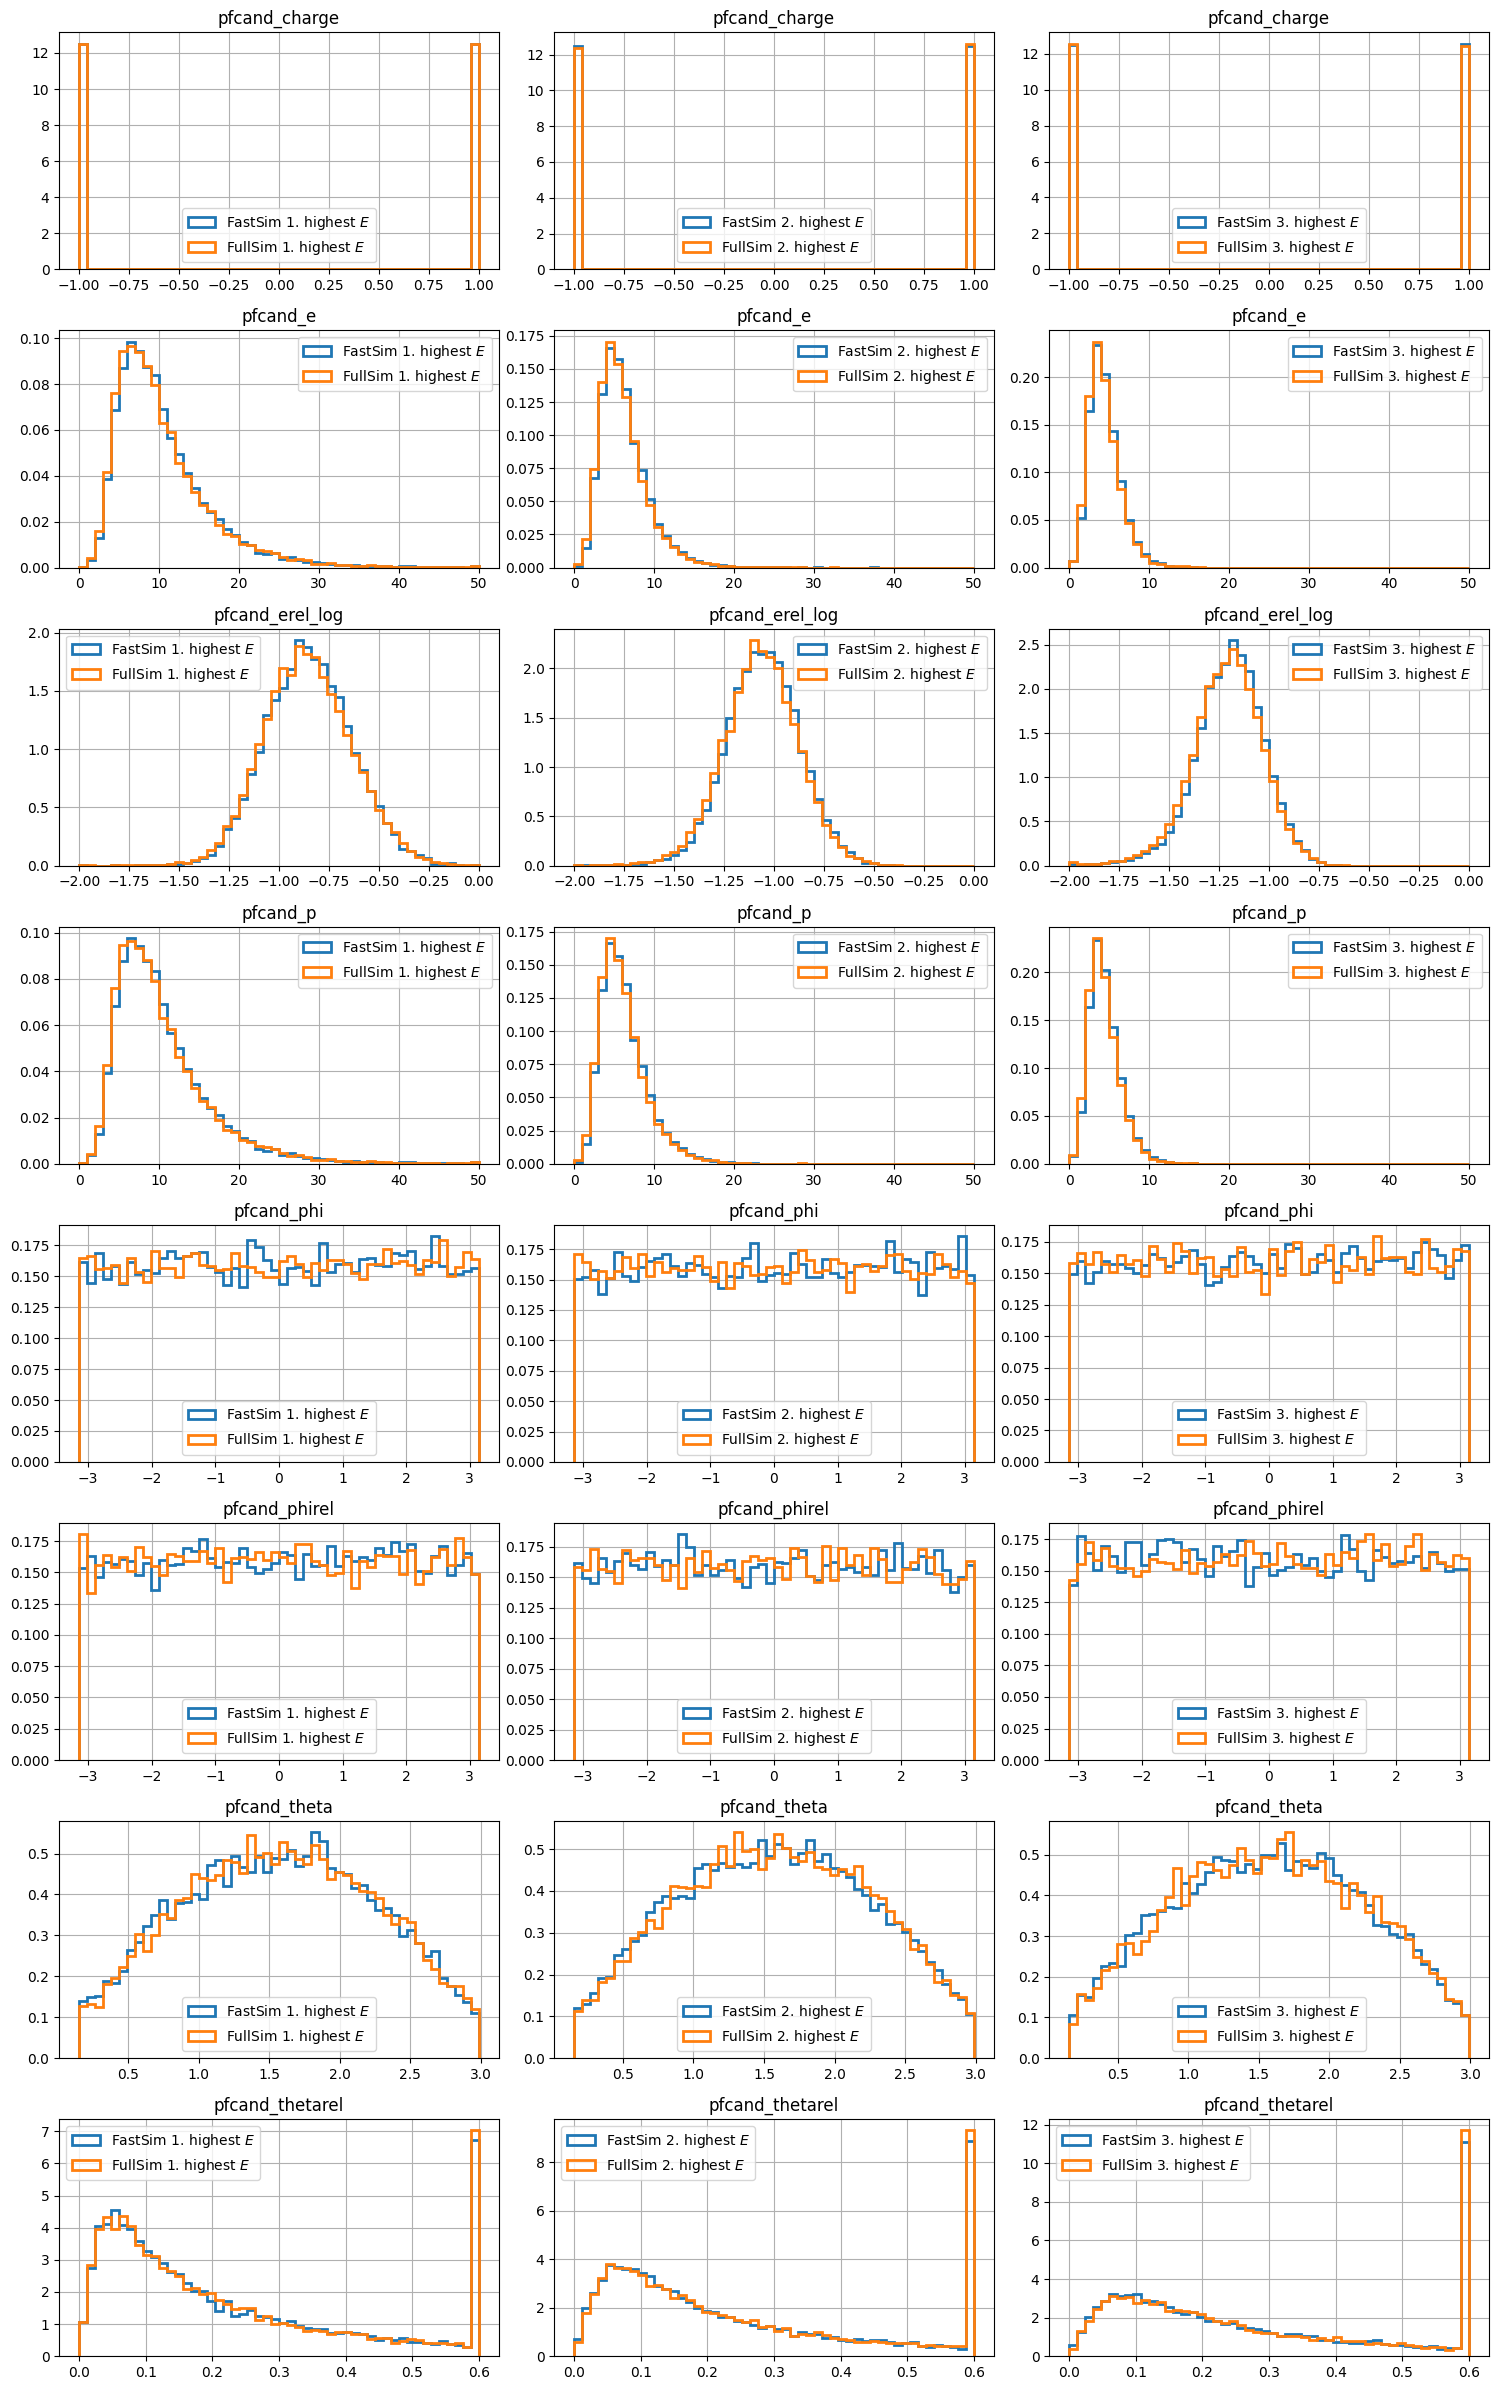

In [65]:
keys= [ 'pfcand_charge',
 'pfcand_e',
 'pfcand_erel_log',
 'pfcand_p',
 'pfcand_phi',
 'pfcand_phirel',
 'pfcand_theta',
 'pfcand_thetarel']

ranges = {
    'pfcand_charge': None,
    'pfcand_e': (0, 50),
    'pfcand_erel_log': (-2,0),
    'pfcand_p': (0, 50),
    'pfcand_phi': None,
    'pfcand_phirel': None,
    'pfcand_theta': None,
    'pfcand_thetarel': (0, 0.6)
}

plot_key_highest_e_cpart(keys, bins=50, r=ranges, save=save_status, path='./hist-Hbb-15k/jetct_cp_properties.pdf')

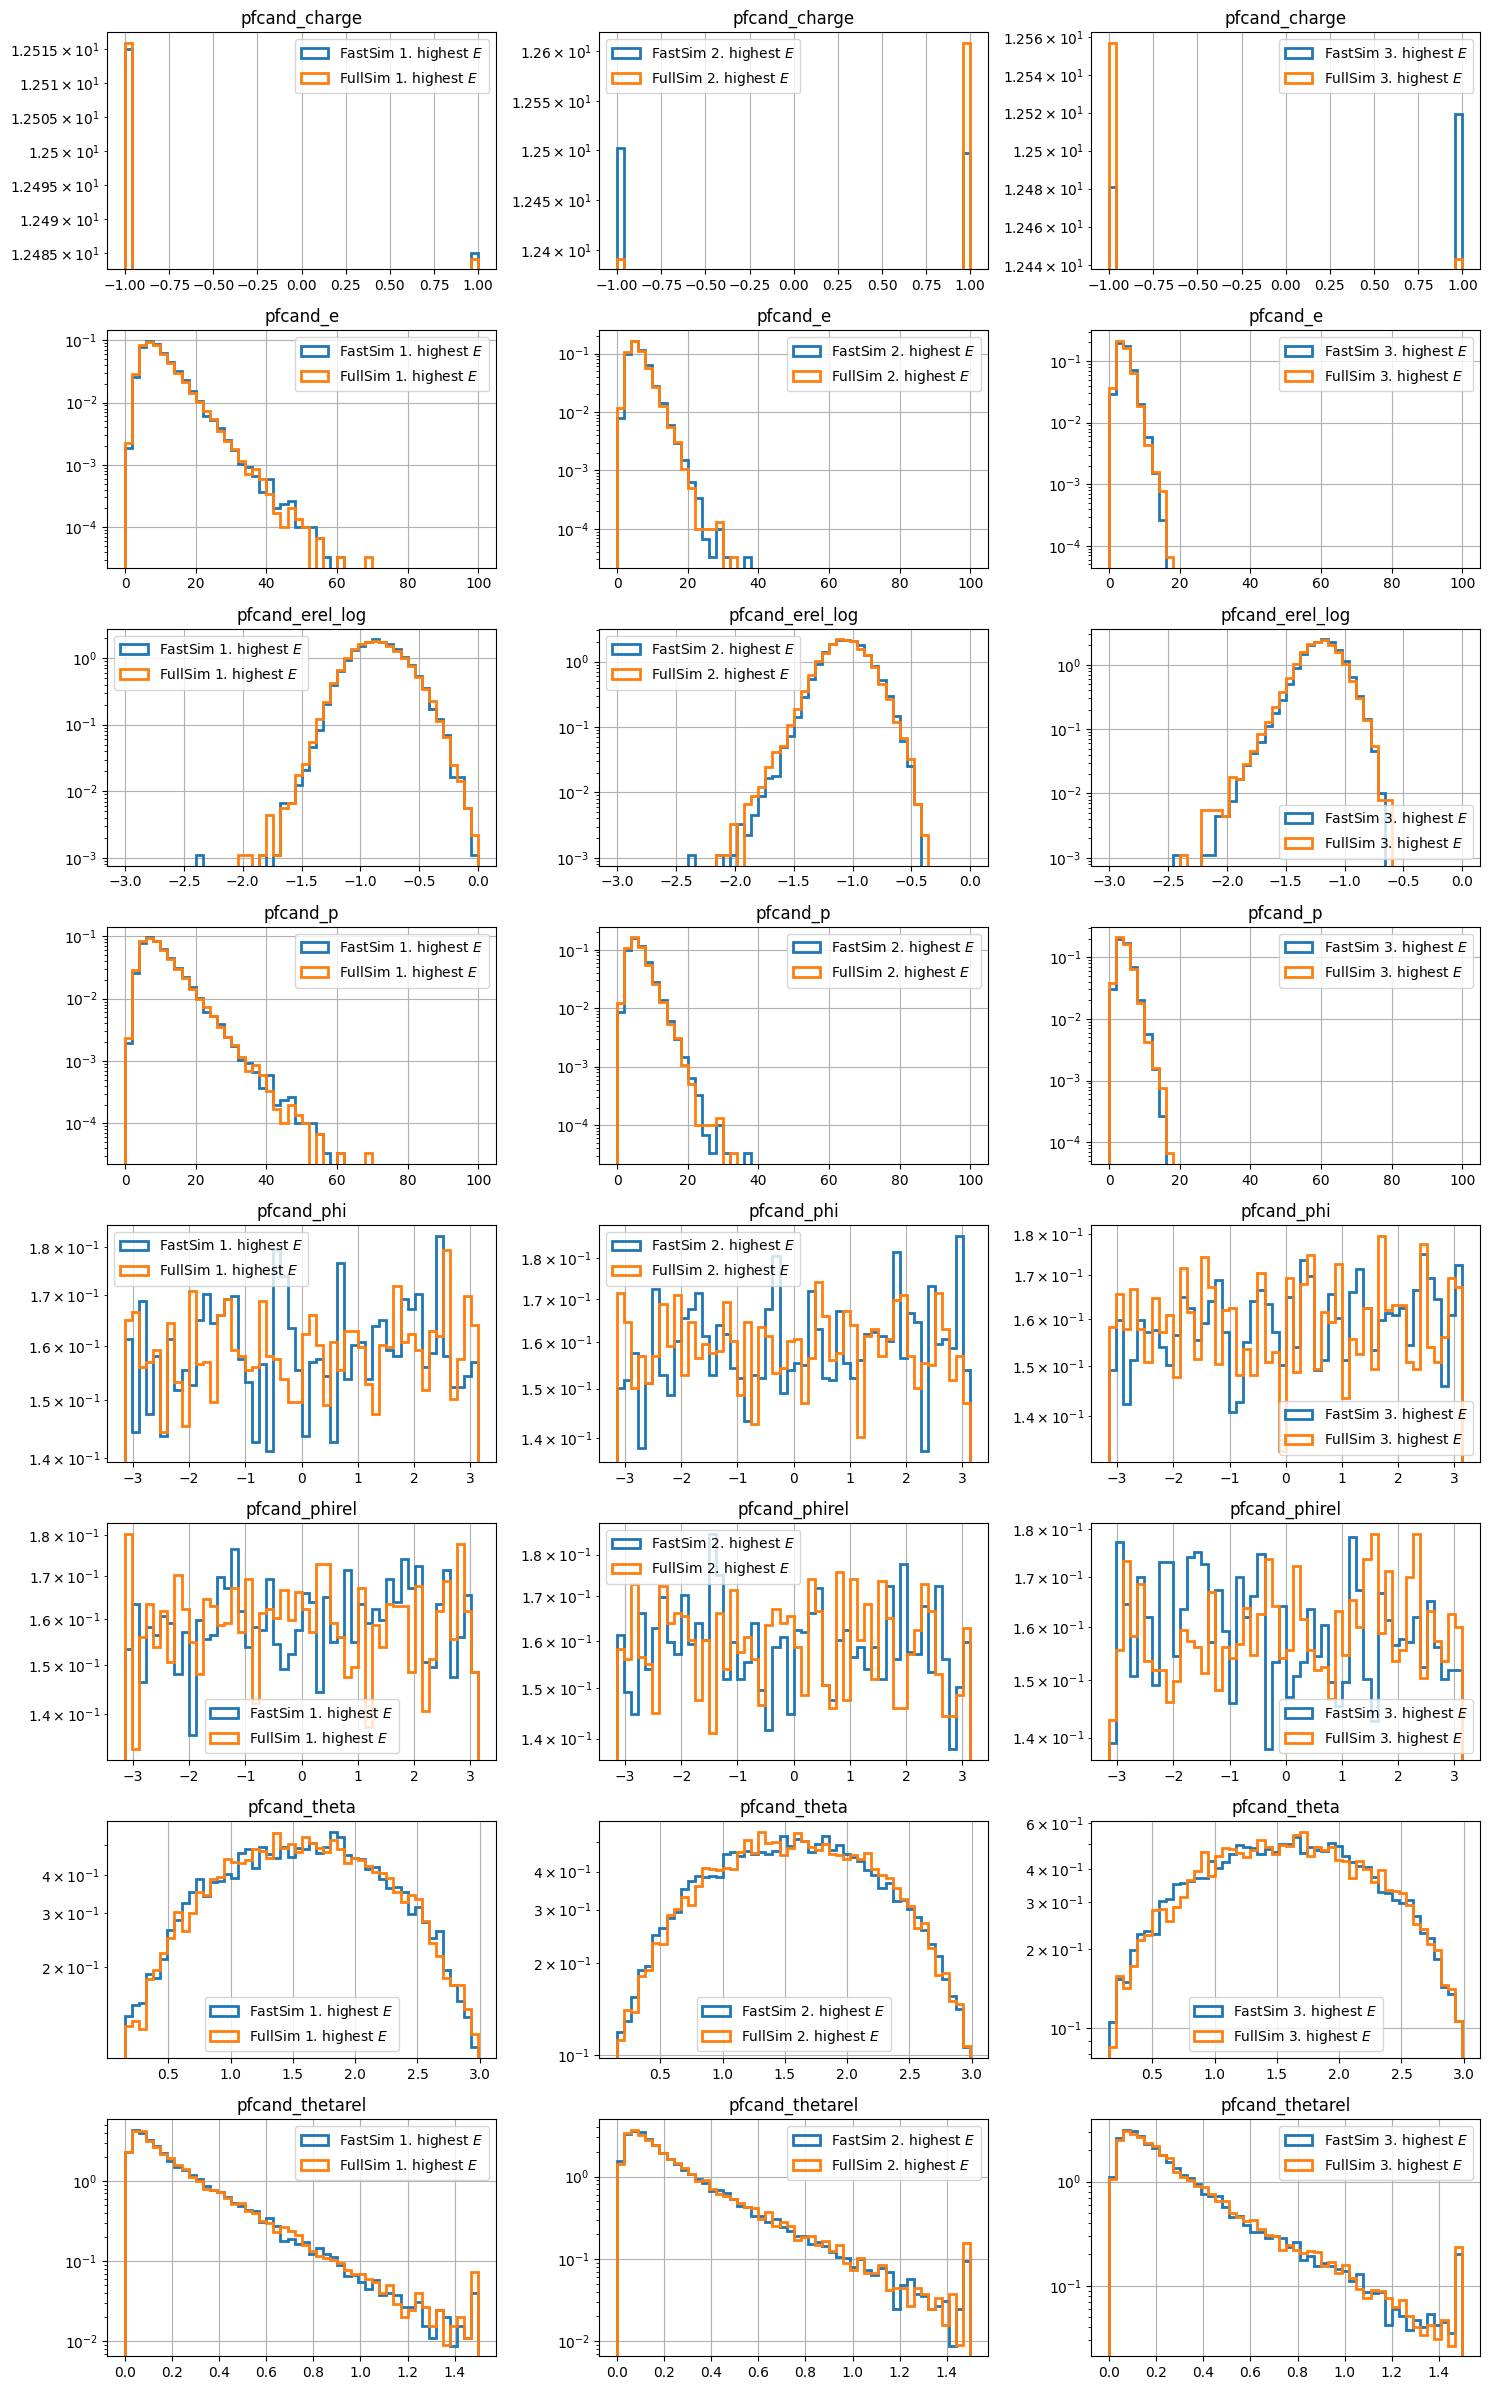

In [66]:
keys= [ 'pfcand_charge',
 'pfcand_e',
 'pfcand_erel_log',
 'pfcand_p',
 'pfcand_phi',
 'pfcand_phirel',
 'pfcand_theta',
 'pfcand_thetarel']

ranges = {
    'pfcand_charge': None,
    'pfcand_e': (0, 100),
    'pfcand_erel_log': (-3, 0),
    'pfcand_p': (0, 100),
    'pfcand_phi': None,
    'pfcand_phirel': None,
    'pfcand_theta': None,
    'pfcand_thetarel': (0,1.5)
}

plot_key_highest_e_cpart(keys, bins=50, r=ranges, save=save_status, log=True, path='./hist-Hbb-15k/jetct_cp_properties_log.pdf')

Looks good!

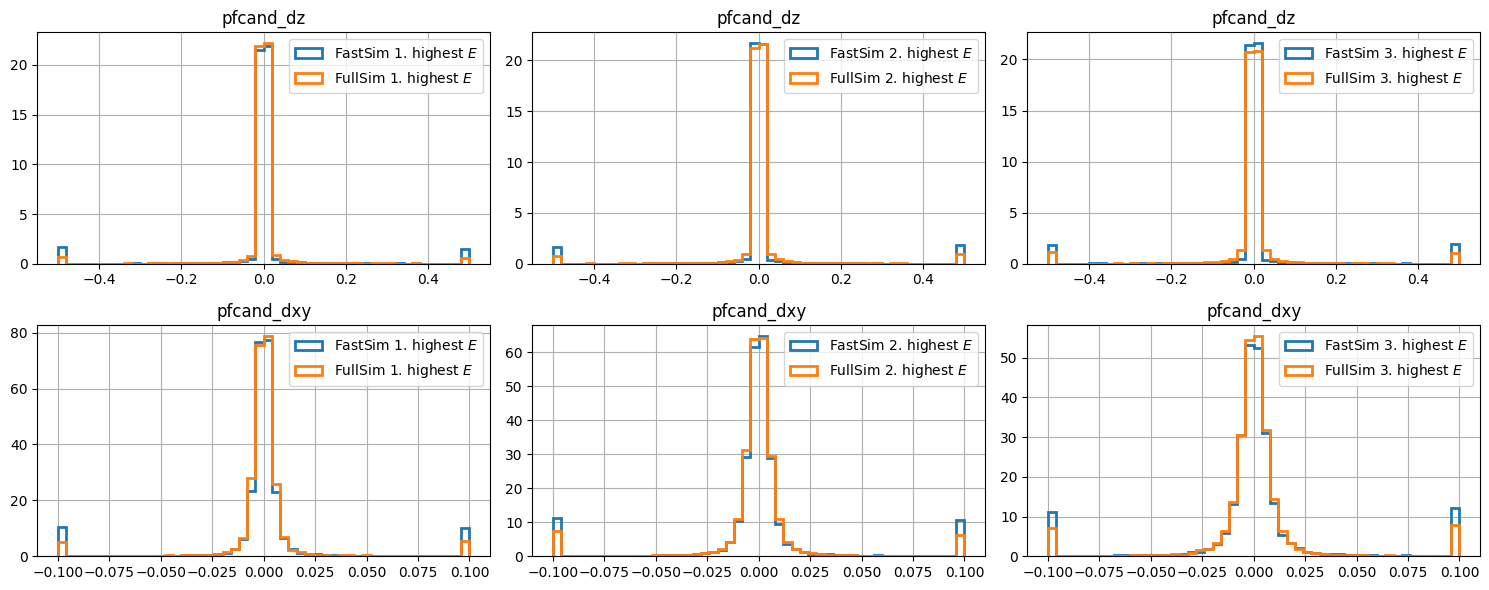

In [67]:
keys = ['pfcand_dz',
        'pfcand_dxy']

ranges = {
    'pfcand_dz': [-0.5, 0.5],
    'pfcand_dxy': [-0.1, 0.1]}

plot_key_highest_e_cpart(keys, r=ranges, bins=50, save=save_status, path='./hist-Hbb-15k/jetct_cp_ip.pdf')

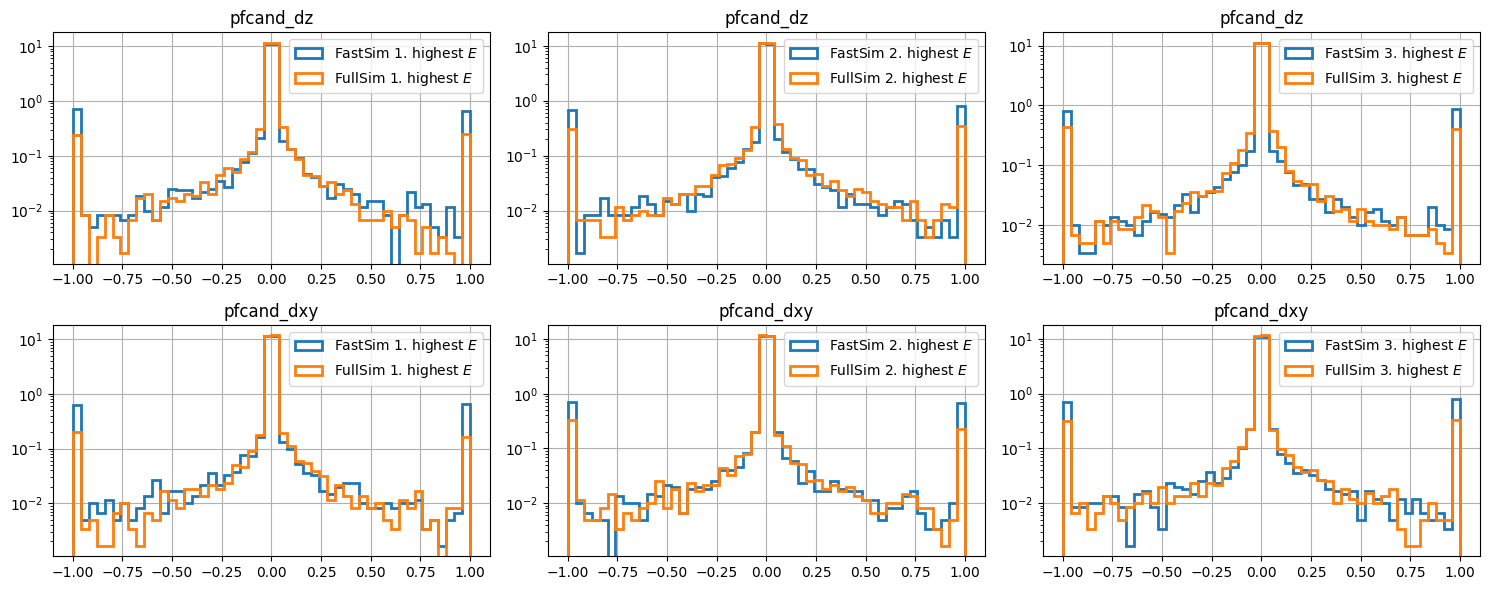

In [68]:
keys = ['pfcand_dz',
        'pfcand_dxy']

ranges = {
    'pfcand_dz': [-1, 1],
    'pfcand_dxy': [-1, 1]}

plot_key_highest_e_cpart(keys, r=ranges, bins=50, log=True, save=save_status, path='./hist-Hbb-15k/jetct_cp_ip_log.pdf')

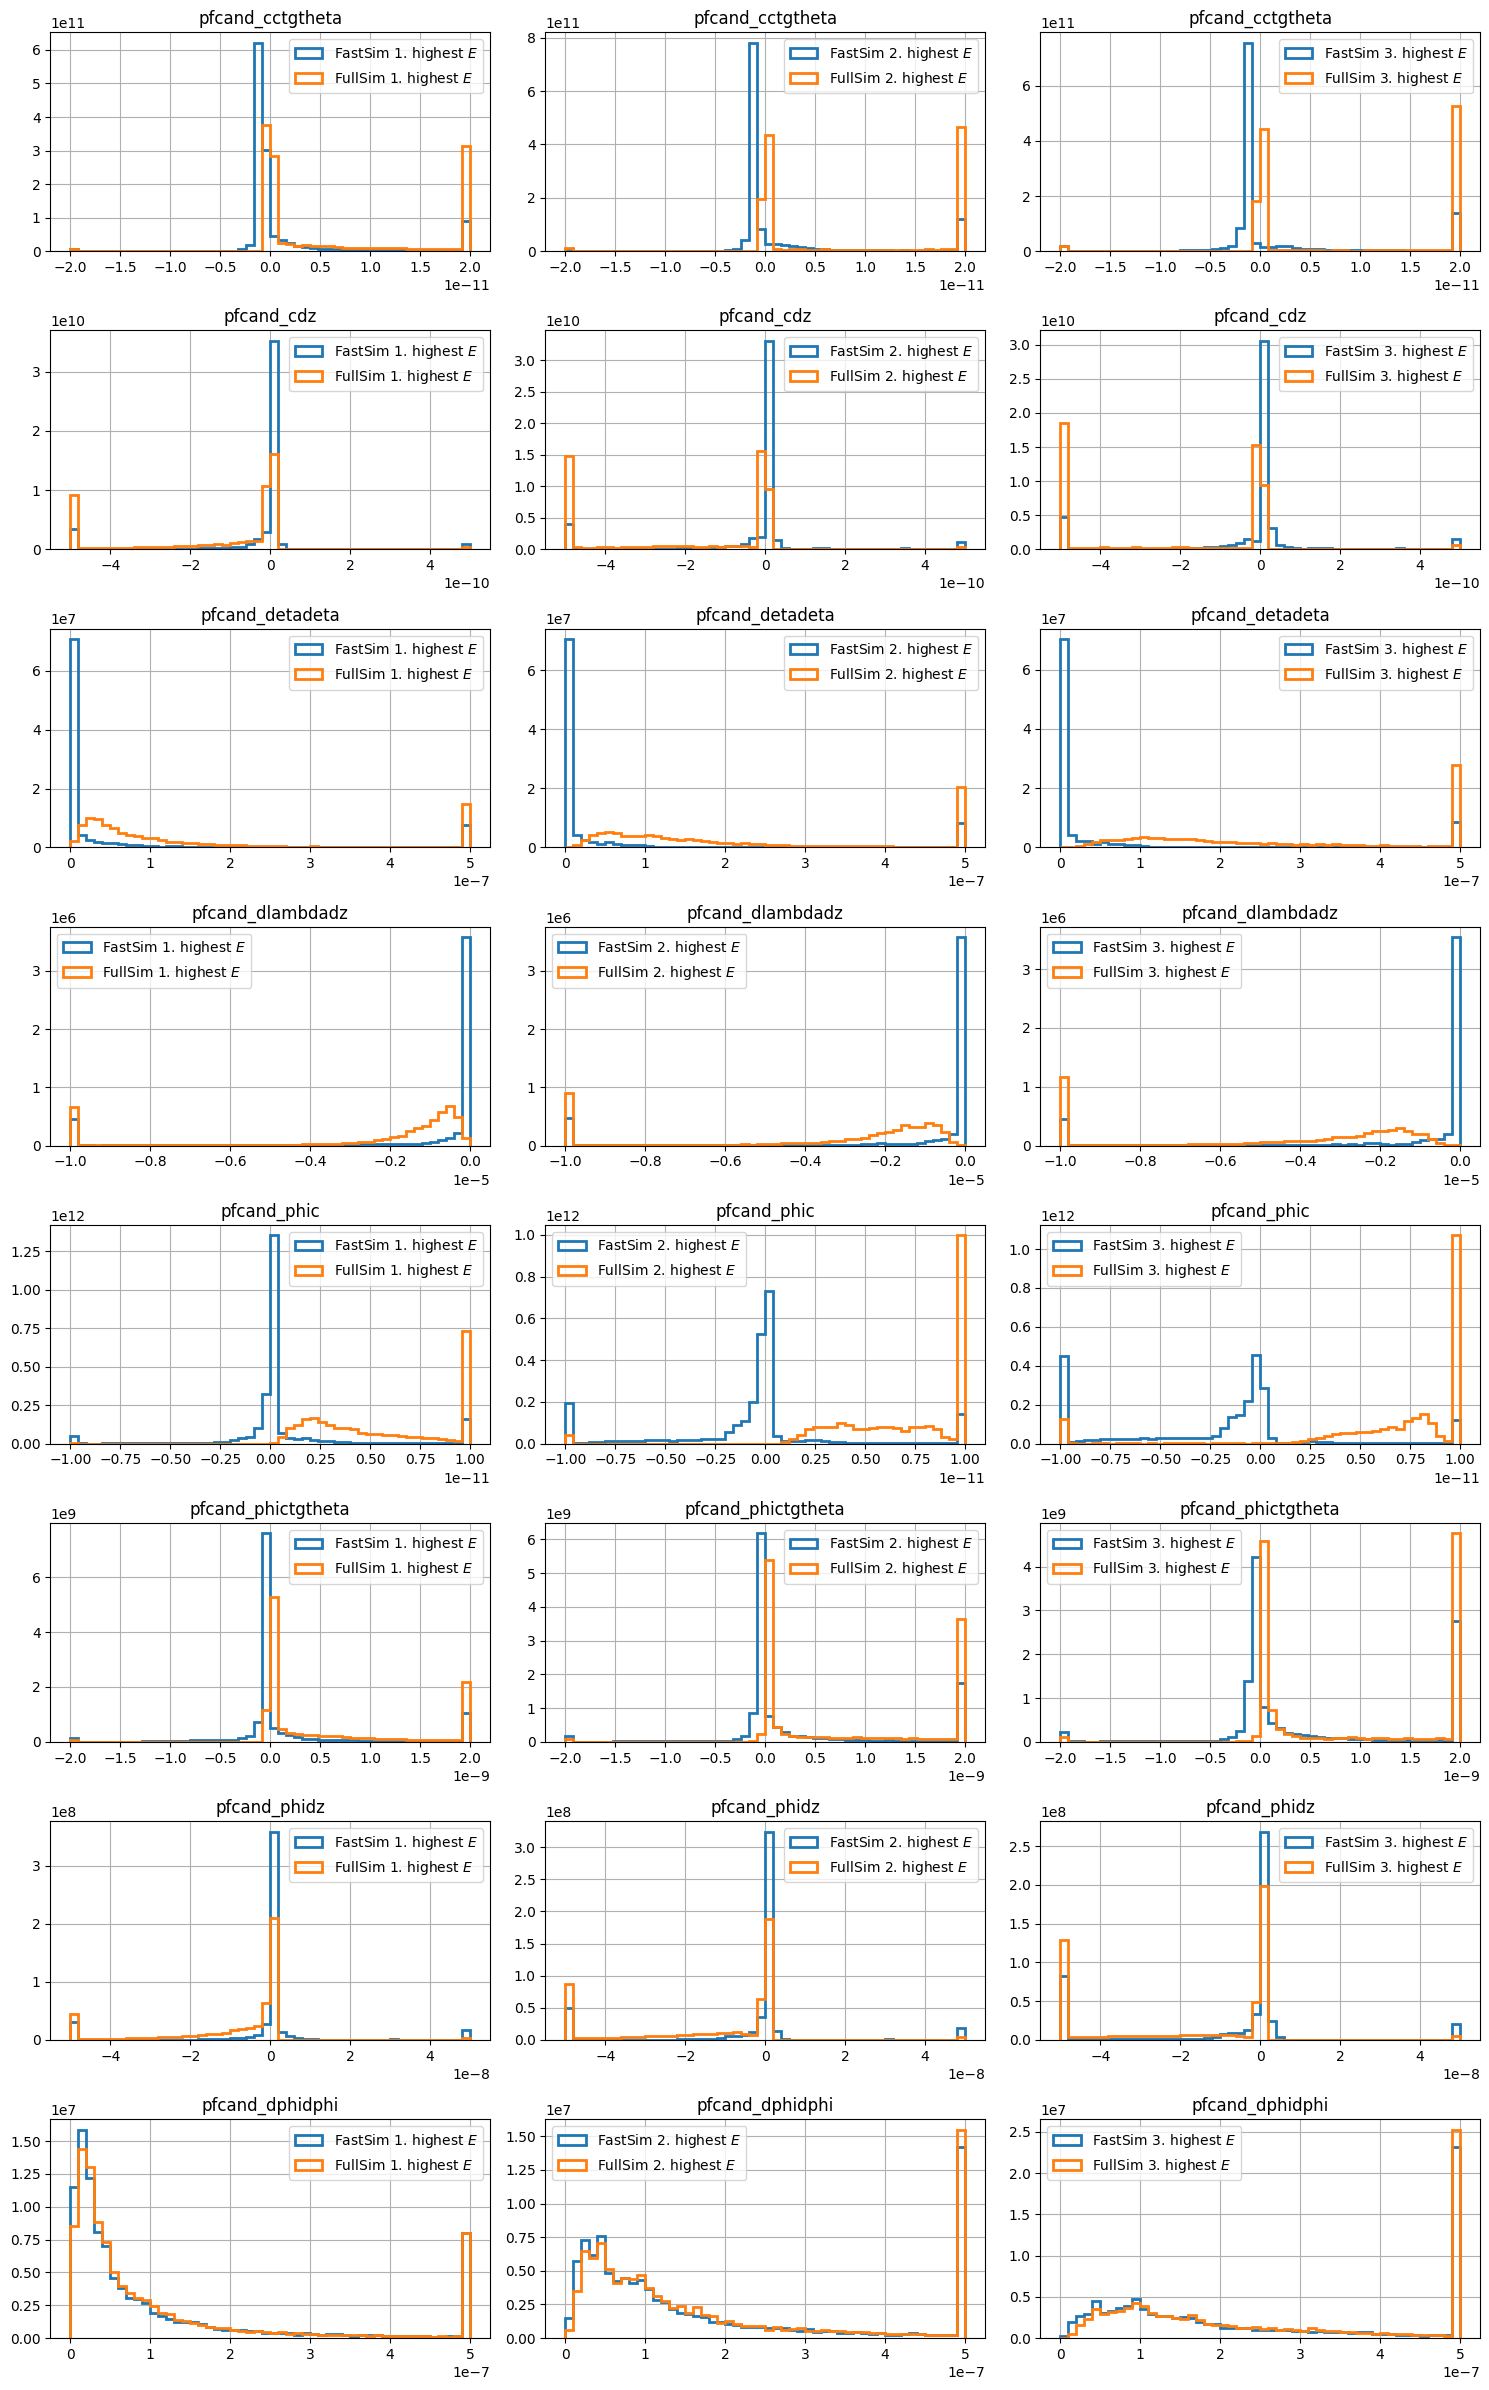

In [69]:
# this plot should be better because we look at charged hadrons only which leave a track!

keys = [
 'pfcand_cctgtheta',
 'pfcand_cdz',
 'pfcand_detadeta',
 'pfcand_dlambdadz',
 'pfcand_phic',
 'pfcand_phictgtheta',
 'pfcand_phidz',
 'pfcand_dphidphi']

ranges = {
    'pfcand_cctgtheta': [-0.2e-10, 0.2e-10],
    'pfcand_cdz': [-0.5e-09, 0.5e-09],
    'pfcand_detadeta': [0, 0.5e-6],
    'pfcand_dlambdadz': [-1e-5, 0],
    'pfcand_phic': [-0.1e-10, 0.1e-10],
    'pfcand_phictgtheta': [-0.2e-08, 0.2e-08], 
    'pfcand_phidz': [-0.05e-6, 0.05e-6],
    'pfcand_dphidphi': [0.0, 0.5e-6]
}

plot_key_highest_e_cpart(keys, r=ranges, bins=50, save=save_status, path='./hist-Hbb-15k/jetct_cp_cov1.pdf')

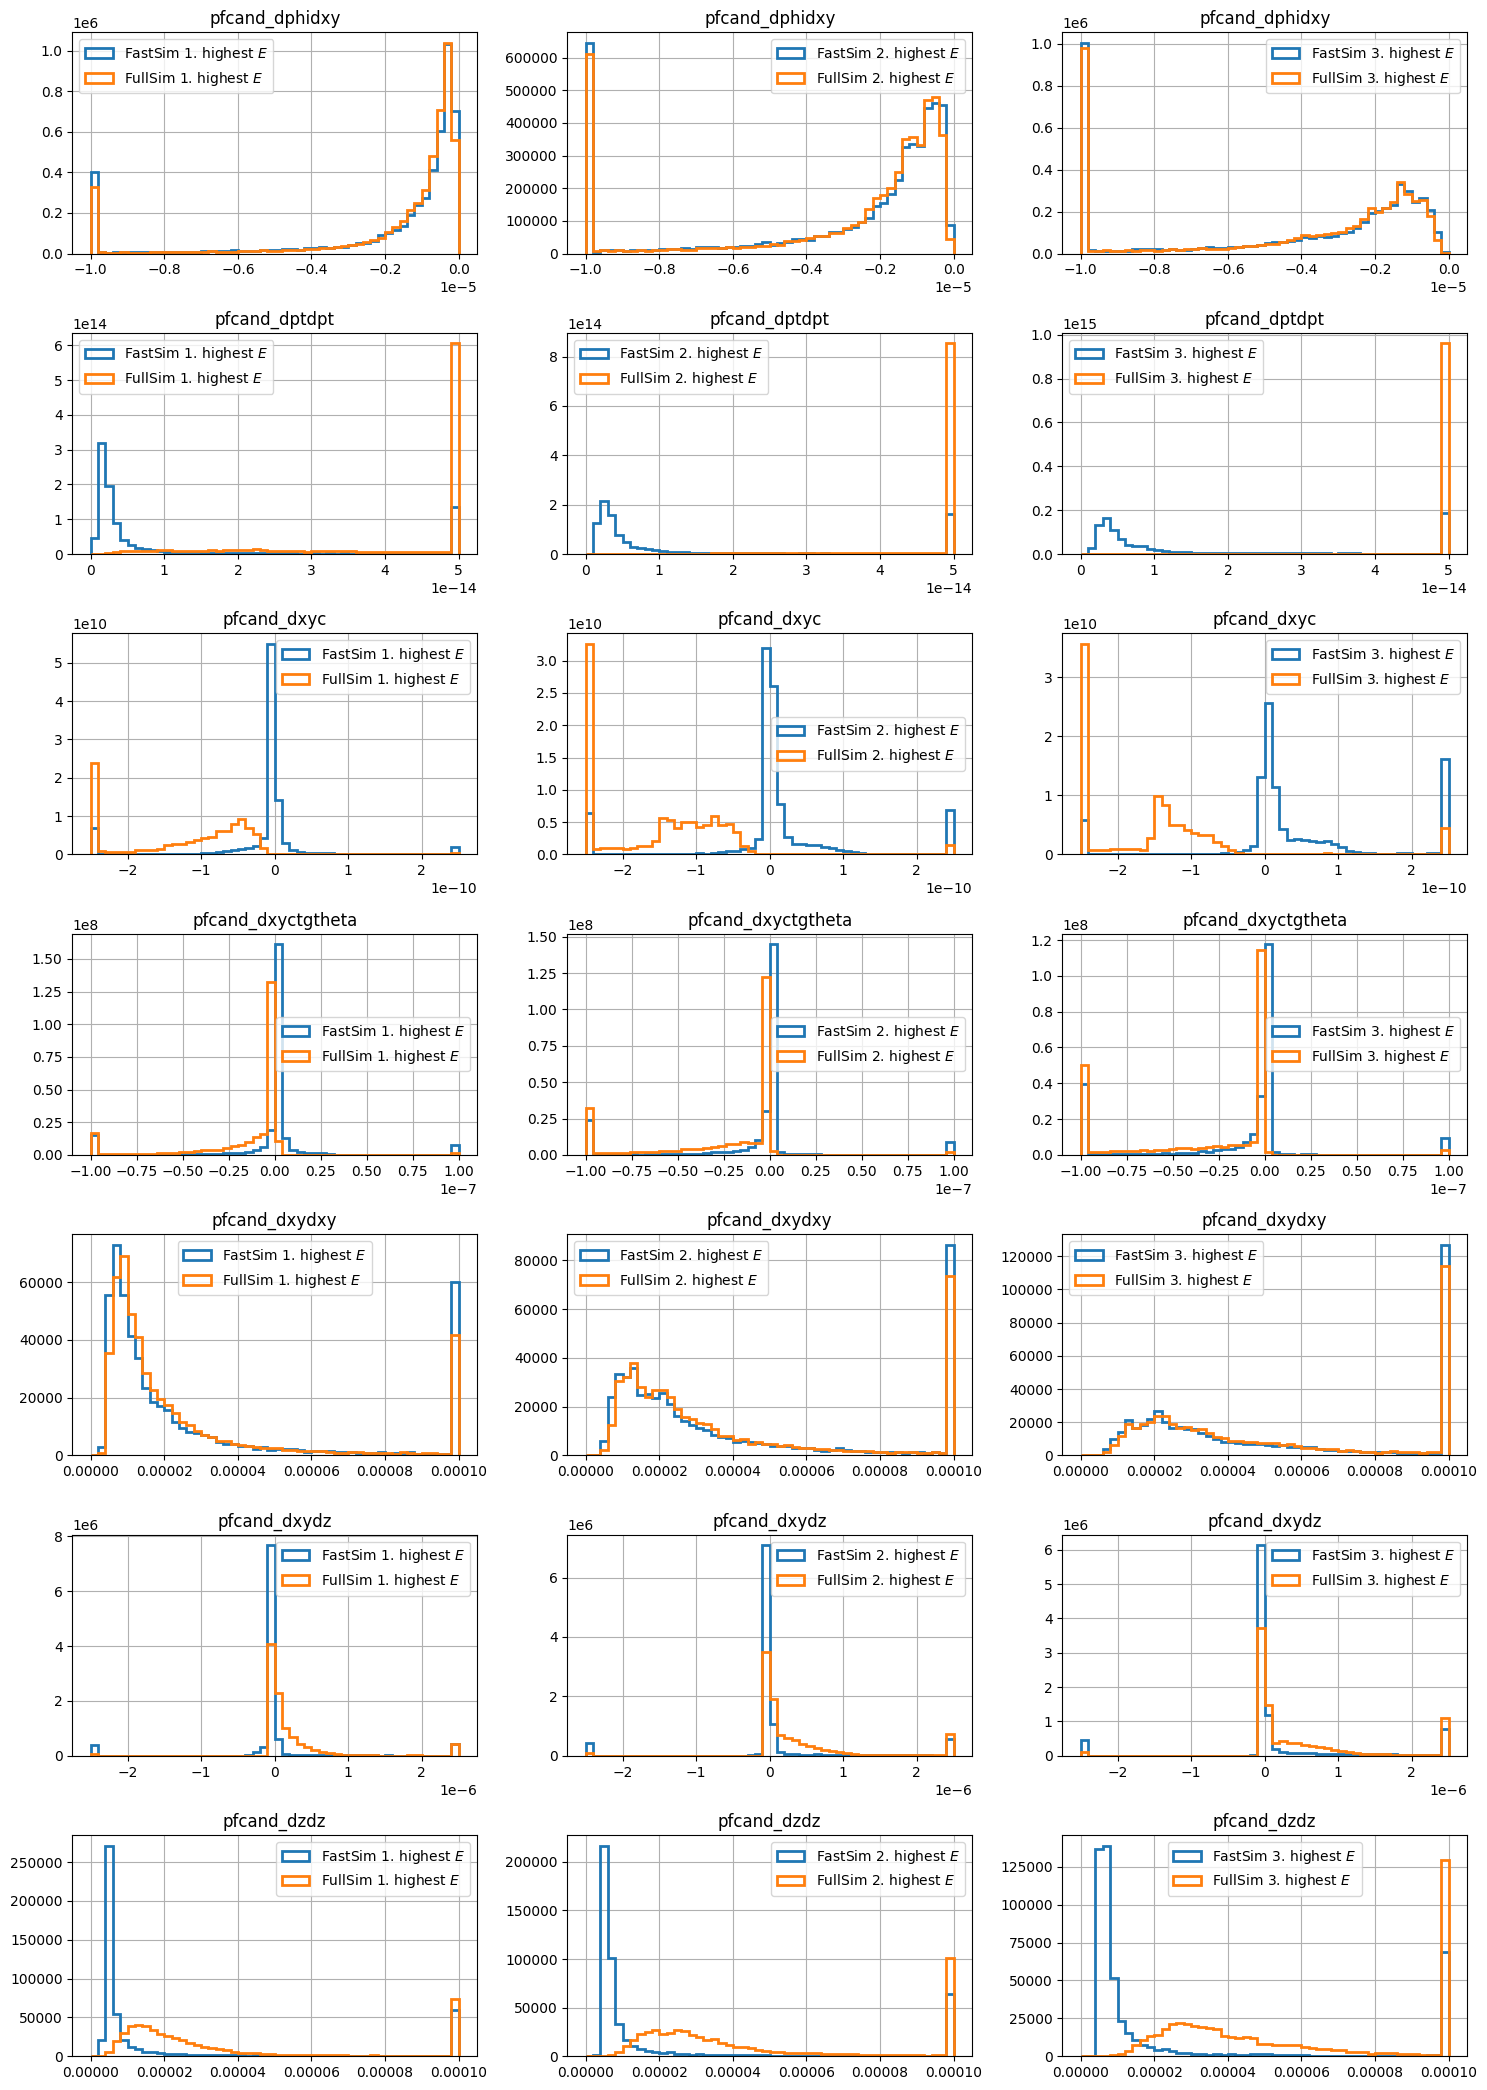

In [70]:
# this plot should be better because we look at charged hadrons only which leave a track!

keys = [
 'pfcand_dphidxy',
 'pfcand_dptdpt',
 'pfcand_dxyc',
 'pfcand_dxyctgtheta',
 'pfcand_dxydxy',
 'pfcand_dxydz',
 'pfcand_dzdz']

ranges = {
    'pfcand_dphidxy': [-1e-5, 0],
    'pfcand_dptdpt': [0, 0.5e-13], 
    'pfcand_dxyc': [-0.25e-9, 0.25e-9],
    'pfcand_dxyctgtheta': [-0.1e-6, 0.1e-6], 
    'pfcand_dxydxy': [0, 1e-4],
    'pfcand_dxydz': [-0.25e-5, 0.25e-5], # here
    'pfcand_dzdz': [0, 1e-4],
}

plot_key_highest_e_cpart(keys, r=ranges, bins=50, save=save_status, path='./hist-Hbb-15k/jetct_cp_cov2.pdf')

Like above

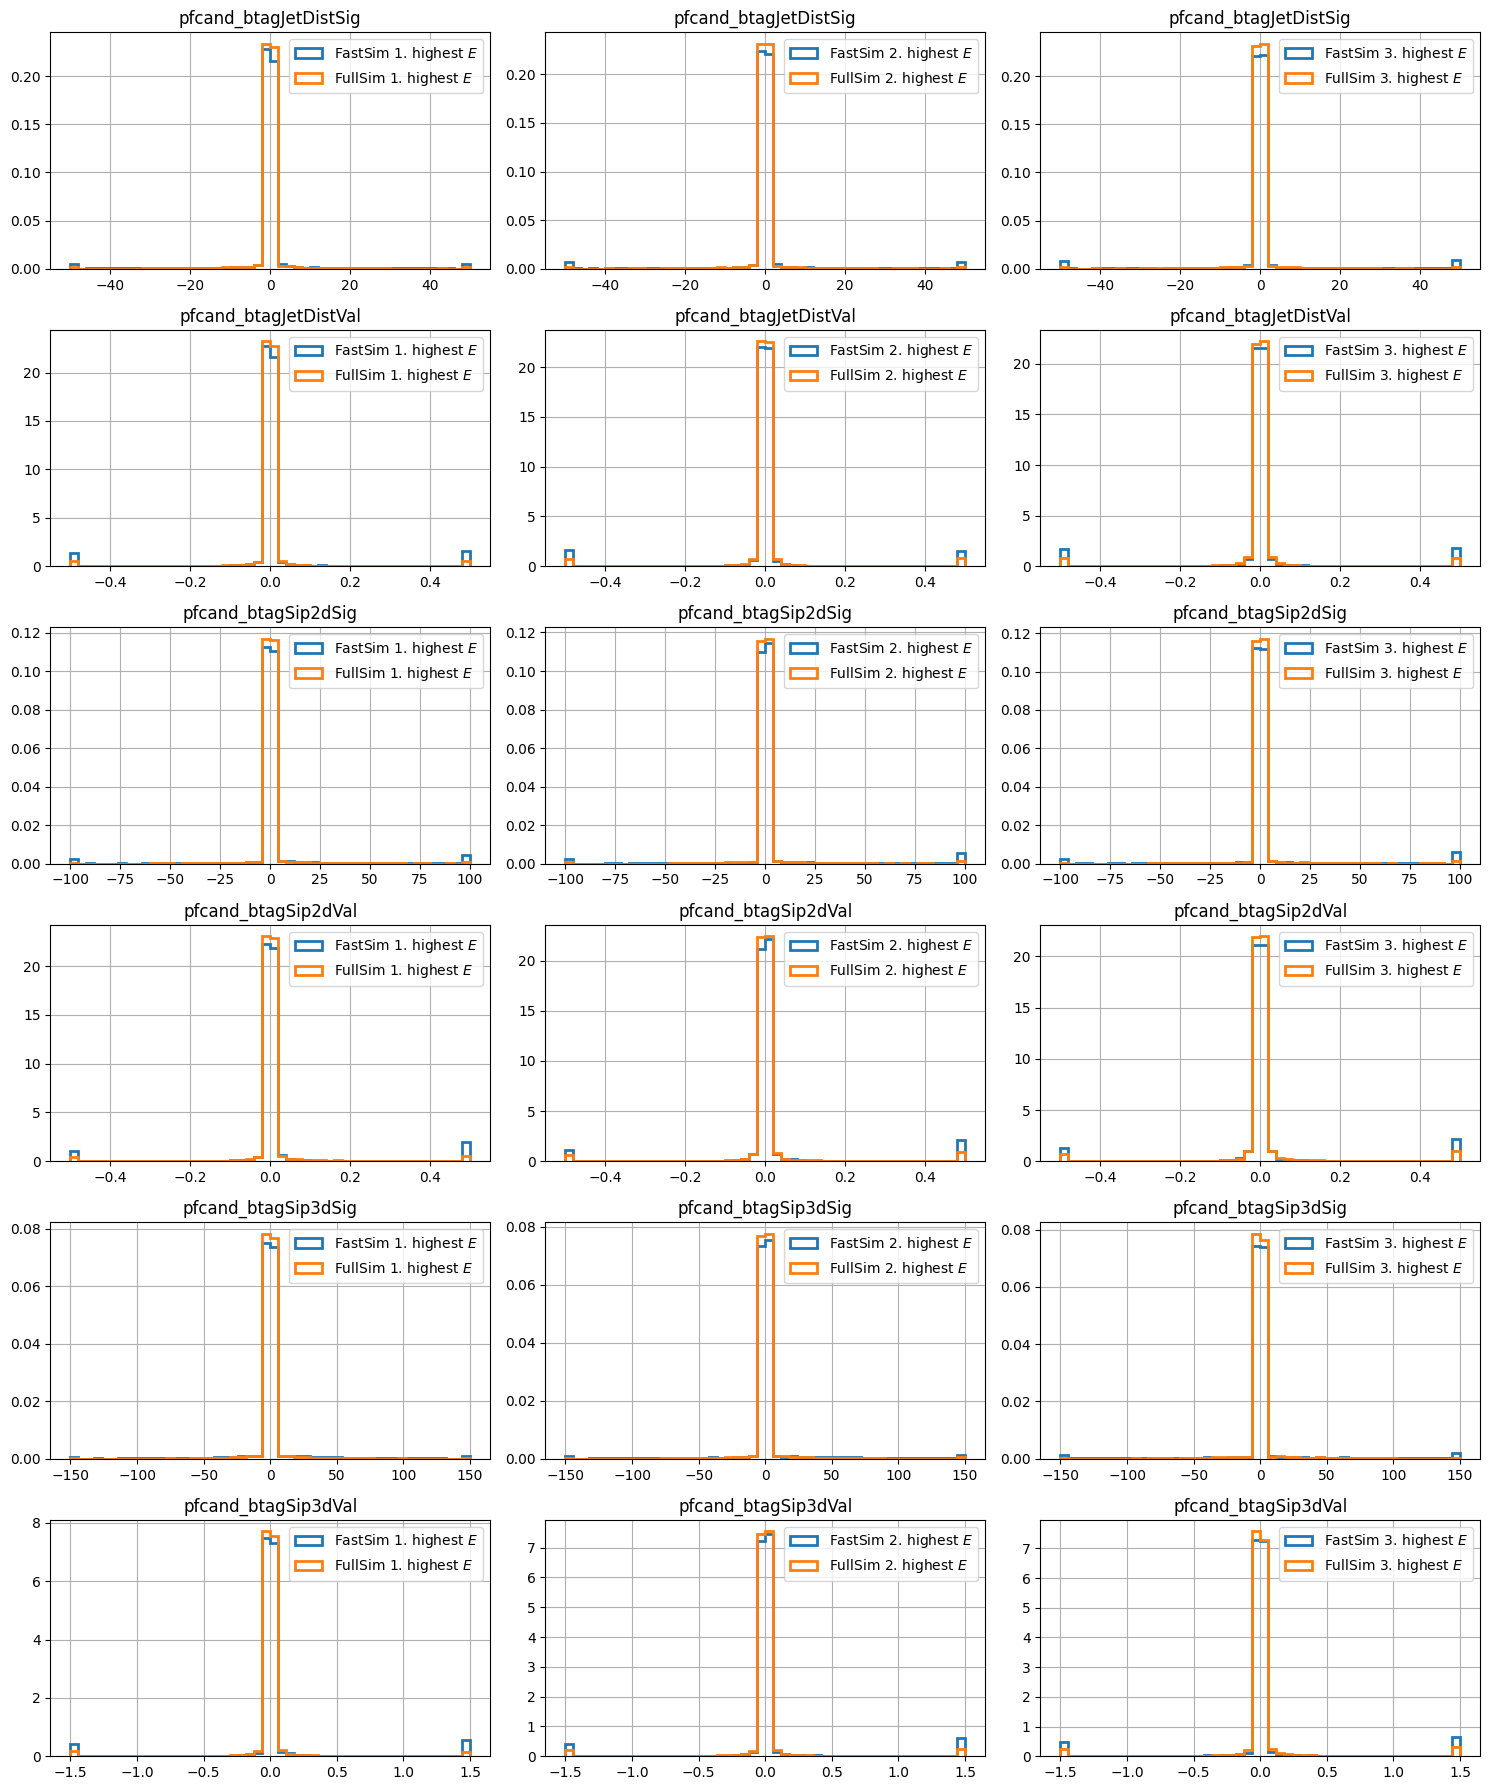

In [71]:


keys = ['pfcand_btagJetDistSig',
 'pfcand_btagJetDistVal',
 'pfcand_btagSip2dSig',
 'pfcand_btagSip2dVal',
 'pfcand_btagSip3dSig',
 'pfcand_btagSip3dVal']

ranges = {
    'pfcand_btagJetDistSig': [-50, 50],
    'pfcand_btagJetDistVal': [-0.5, 0.5],
    'pfcand_btagSip2dSig': [-100, 100],
    'pfcand_btagSip2dVal': [-0.5, 0.5],
    'pfcand_btagSip3dSig': [-150, 150],
    'pfcand_btagSip3dVal': [-1.5, 1.5]
}

plot_key_highest_e_cpart(keys, r=ranges, bins=50, save=save_status, path='./hist-Hbb-15k/jetct_cp_dist.pdf')

Let's see if we can spot the dip like in Micheles paper!

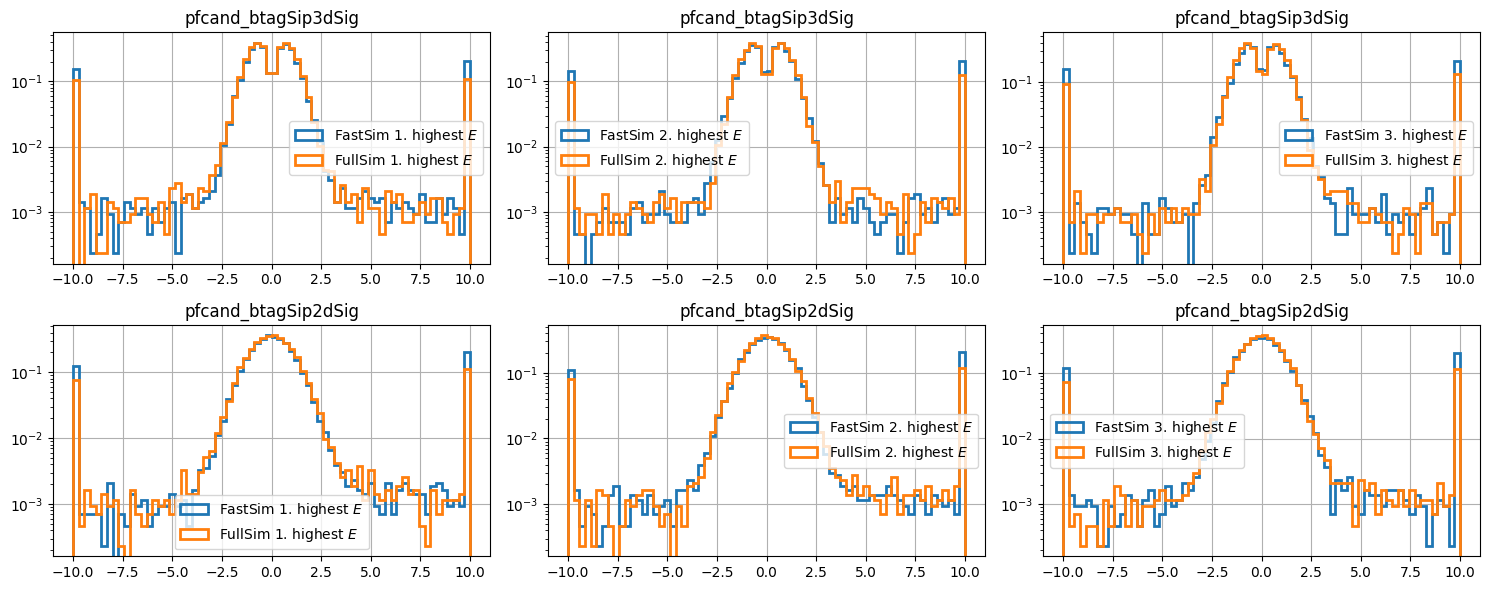

In [72]:
# these plots make even more sense than the one above because we look at charged hadrons only which leave a track!

keys = [
 'pfcand_btagSip3dSig',
 'pfcand_btagSip2dSig',
]

ranges = {
    'pfcand_btagSip3dSig': [-10, 10],
    'pfcand_btagSip2dSig': [-10, 10],
}

plot_key_highest_e_cpart(keys, r=ranges, bins=70, log=True, save=save_status, path='./hist-Hbb-15k/jetct_cp_sip_dip.pdf')

## Alright: Now neutral particles!

In [73]:
def plot_key_highest_e_npart(keys, k=3, r=None, bins=20, log=False, save=False, path=None):
    fig, axs = plt.subplots(len(keys), k, figsize=(15, 3 * len(keys))) 

    # loop over keys: 
    for idx, key in enumerate(keys):
        a_list = get_chad_elements(df_IDEA[key], index_neutral_3E_IDEA)
        b_list = get_chad_elements(df_CLD[key], index_neutral_3E_CLD)

        ri = r[key] if r != None else None
        for i in range(k):
            ax = axs[idx, i]
            
            a = a_list[i]
            b = b_list[i]

            if ri == None:
                combined_min = min(a.min(), b.min())
                combined_max = max(a.max(), b.max())
                combined_range = (combined_min, combined_max)
            else:
                combined_range = ri
                # make overflow bins
                a = np.clip(a, *combined_range)
                b = np.clip(b, *combined_range)
            
            ax.set_title(key)
            ax.hist(a, bins=bins, histtype='step', linewidth=2.0, range=combined_range, label=f'FastSim {i+1}'+r'. highest $E$', density=True)
            ax.hist(b, bins=bins, histtype='step', linewidth=2.0, range=combined_range, label=f'FullSim {i+1}'+r'. highest $E$', density=True)
            if log:
                ax.set_yscale('log')
            ax.legend()
            ax.grid()
    plt.tight_layout()
    if save:
        if path==None:
            path = './hist-Hbb-15k/histogram.pdf'
        plt.savefig(path)
    plt.show()

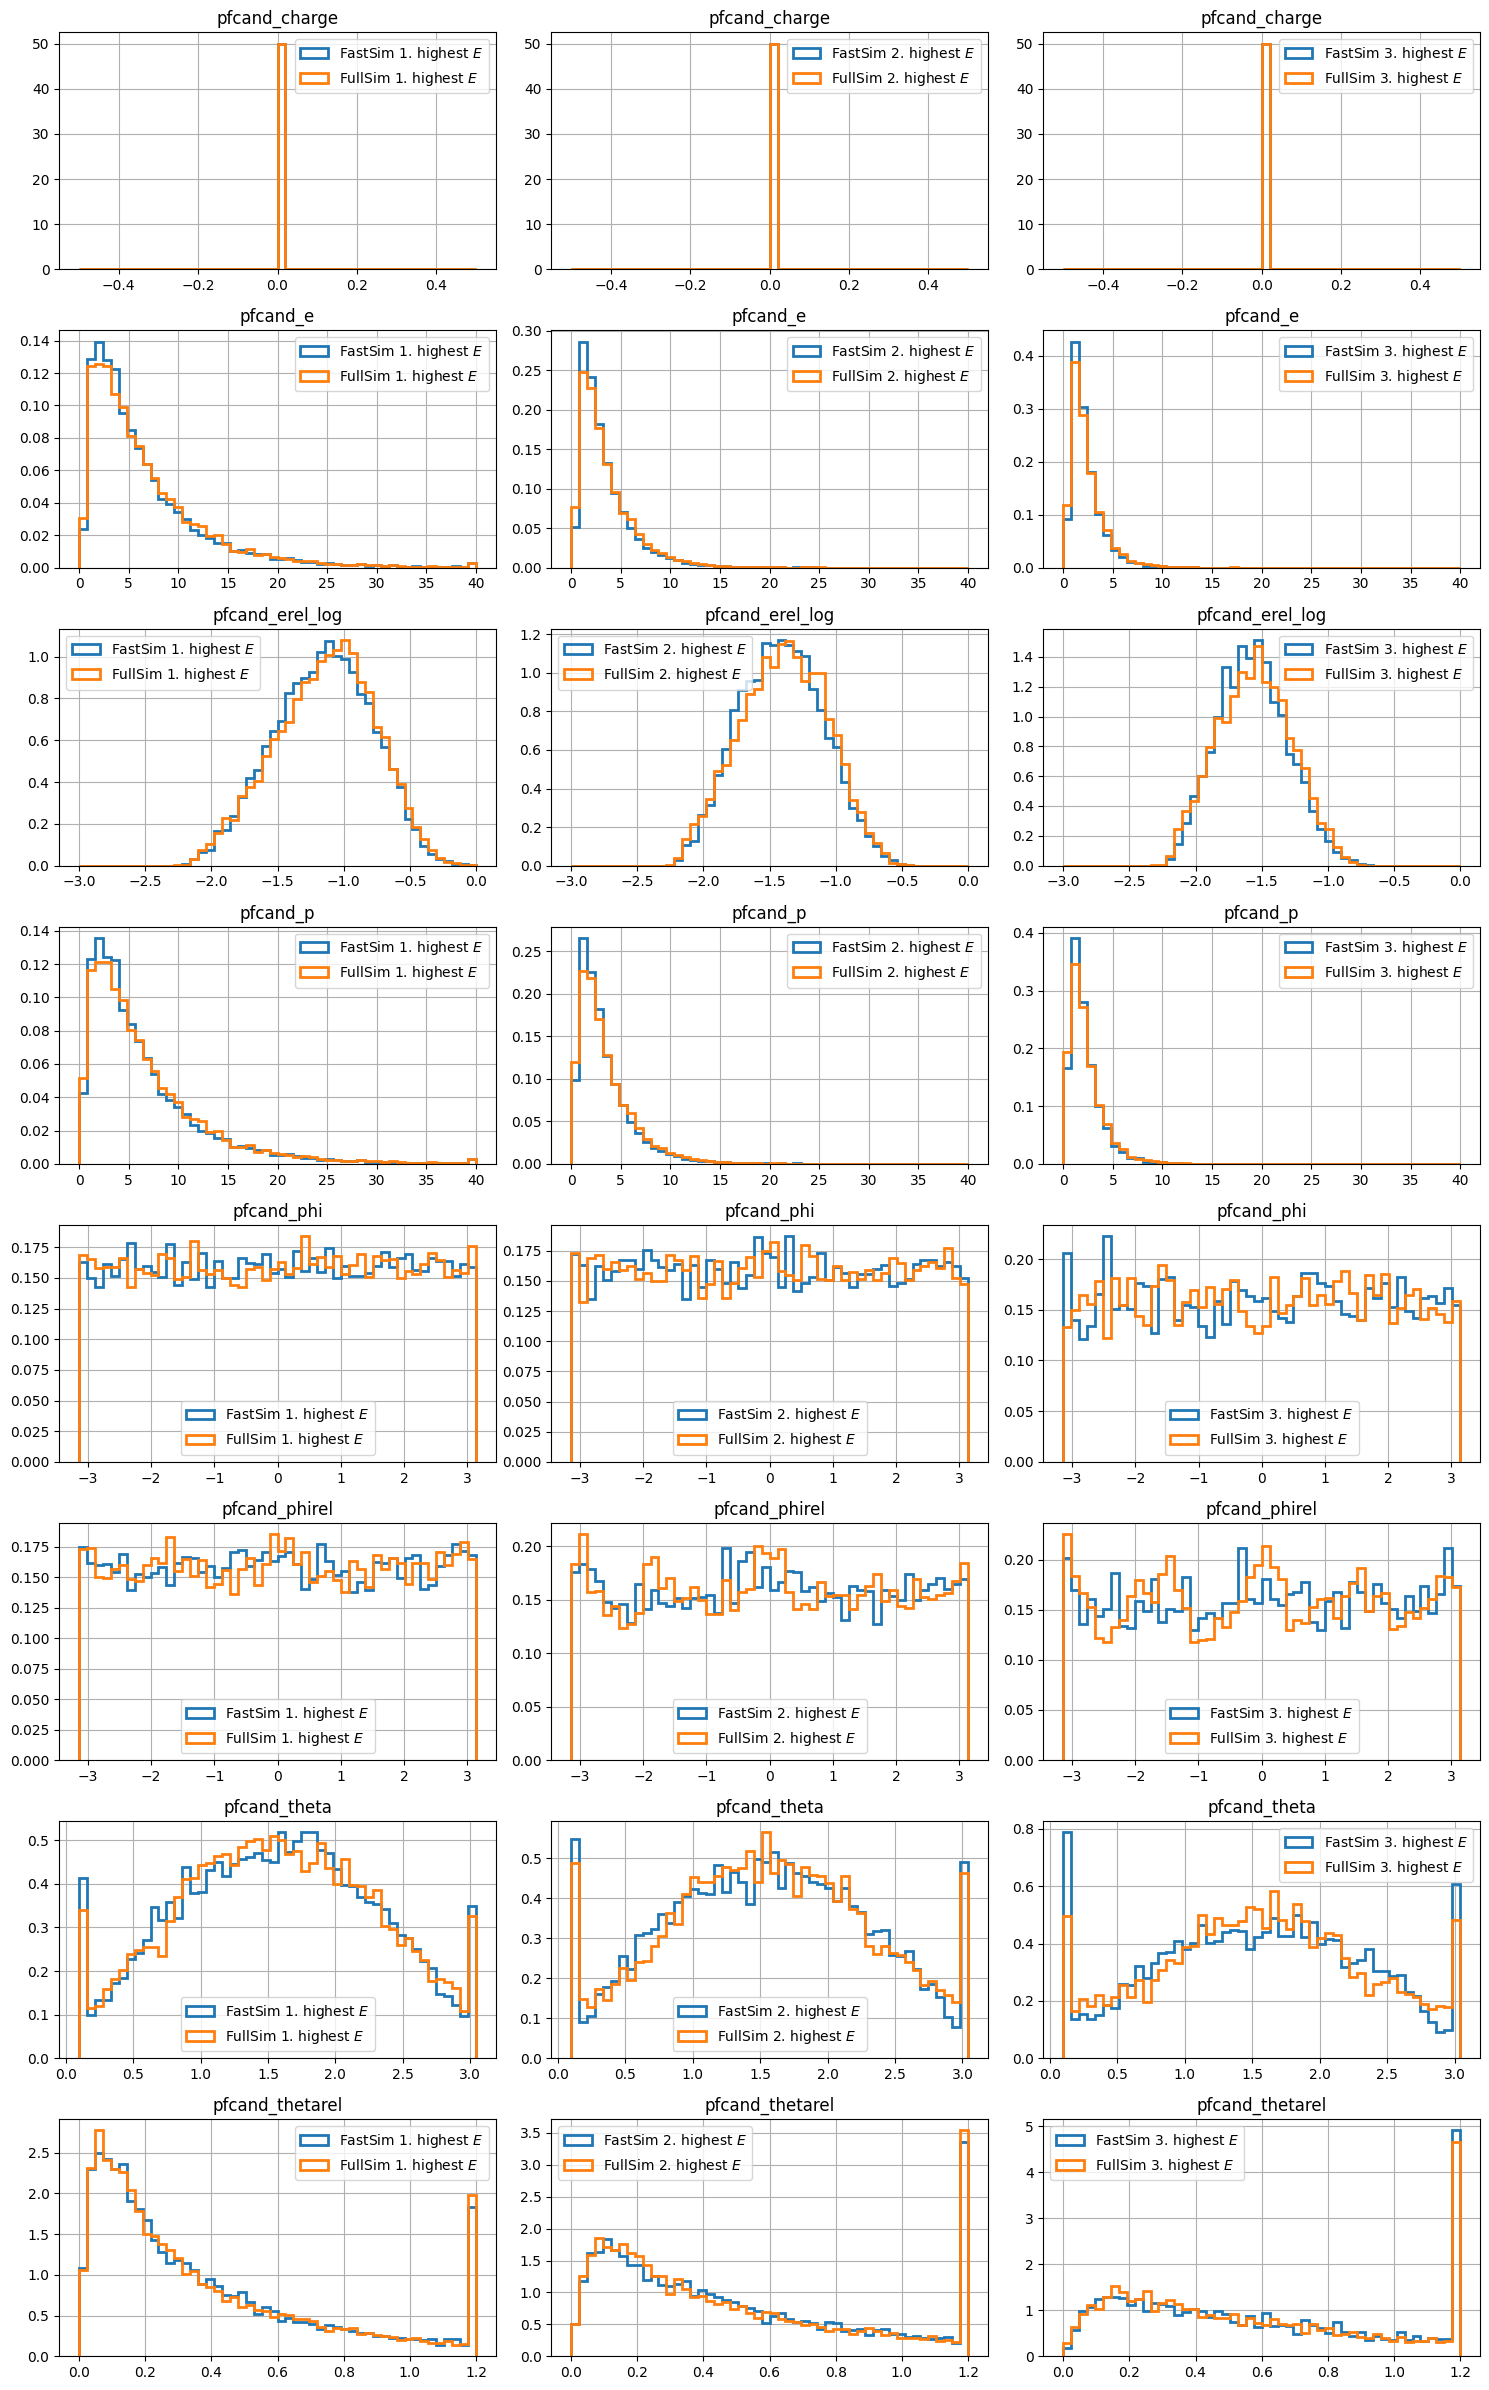

In [74]:
keys= [ 'pfcand_charge',
 'pfcand_e',
 'pfcand_erel_log',
 'pfcand_p',
 'pfcand_phi',
 'pfcand_phirel',
 'pfcand_theta',
 'pfcand_thetarel']

ranges = {
    'pfcand_charge': None,
    'pfcand_e': (0, 40),
    'pfcand_erel_log': (-3, 0),
    'pfcand_p': (0, 40),
    'pfcand_phi': None,
    'pfcand_phirel': None,
    'pfcand_theta': None,
    'pfcand_thetarel': (0,1.2)
}

plot_key_highest_e_npart(keys, bins=50, r=ranges, save=save_status, path='./hist-Hbb-15k/jetct_np_properties.pdf')

We see: less neutrons with small momenta & energy. Distributions look ok'isch?

# For completion: Photons

In [75]:
def plot_key_highest_e_photon(keys, k=3, r=None, bins=20, log=False, save=False, path=None):
    fig, axs = plt.subplots(len(keys), k, figsize=(15, 3 * len(keys))) 

    # loop over keys: 
    for idx, key in enumerate(keys):
        a_list = get_chad_elements(df_IDEA[key], index_photon_3E_IDEA)
        b_list = get_chad_elements(df_CLD[key], index_photon_3E_CLD)

        ri = r[key] if r != None else None
        for i in range(k):
            ax = axs[idx, i]
            
            a = a_list[i]
            b = b_list[i]

            if ri == None:
                combined_min = min(a.min(), b.min())
                combined_max = max(a.max(), b.max())
                combined_range = (combined_min, combined_max)
            else:
                combined_range = ri
                # make overflow bins
                a = np.clip(a, *combined_range)
                b = np.clip(b, *combined_range)
            
            ax.set_title(key)
            ax.hist(a, bins=bins, histtype='step', linewidth=2.0, range=combined_range, label=f'FastSim {i+1}'+r'. highest $E$', density=True)
            ax.hist(b, bins=bins, histtype='step', linewidth=2.0, range=combined_range, label=f'FullSim {i+1}'+r'. highest $E$', density=True)
            if log:
                ax.set_yscale('log')
            ax.legend()
            ax.grid()
    plt.tight_layout()
    if save:
        if path==None:
            path = './hist-Hbb-15k/histogram.pdf'
        plt.savefig(path)
    plt.show()

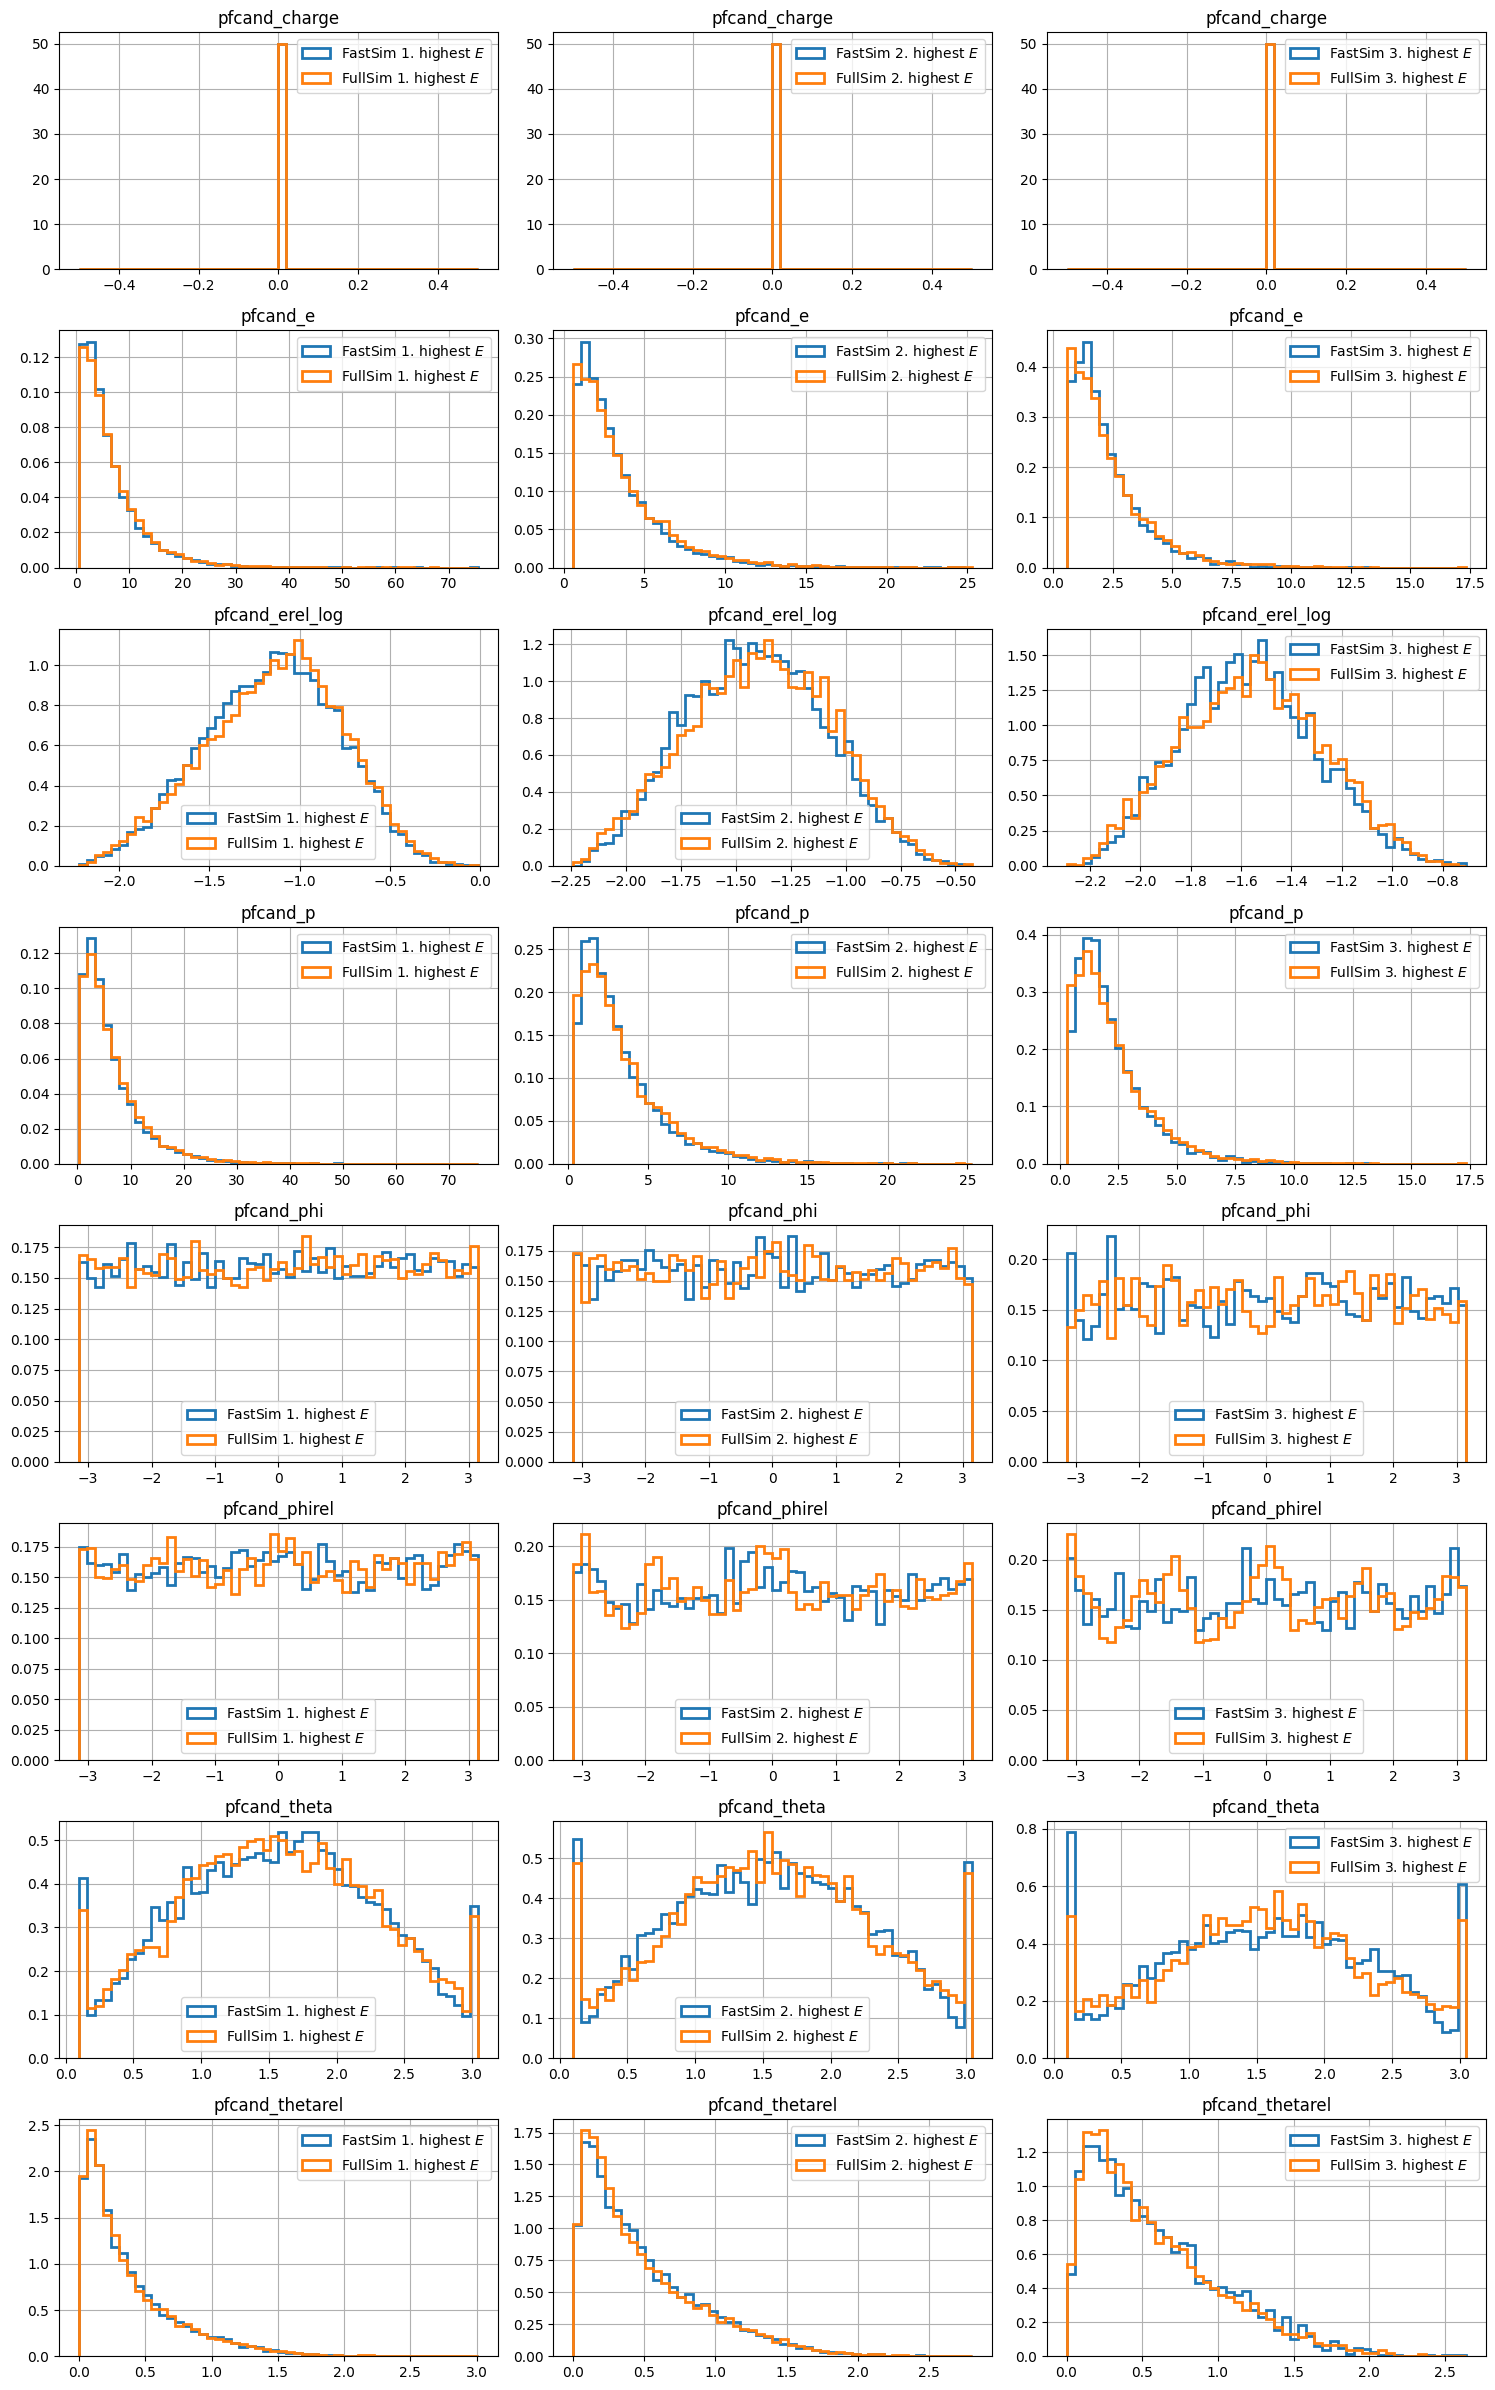

In [76]:
keys= [ 'pfcand_charge',
 'pfcand_e',
 'pfcand_erel_log',
 'pfcand_p',
 'pfcand_phi',
 'pfcand_phirel',
 'pfcand_theta',
 'pfcand_thetarel']

ranges = {
    'pfcand_charge': None,
    'pfcand_e': (0, 40),
    'pfcand_erel_log': (-3, 0),
    'pfcand_p': (0, 40),
    'pfcand_phi': None,
    'pfcand_phirel': None,
    'pfcand_theta': None,
    'pfcand_thetarel': (0,1.2)
}

plot_key_highest_e_npart(keys, bins=50, save=save_status, path='./hist-Hbb-15k/jetct_gamma_properties.pdf')

# Plots for FCC-note

In [77]:
import matplotlib.gridspec as gridspec
from matplotlib.ticker import MultipleLocator, FuncFormatter

In [78]:
df_IDEA = tree_IDEA.arrays(library="np", entry_start=0, entry_stop=250000) #entry_start=0, entry_stop=200, 
df_CLD = tree_CLD.arrays(library="np", entry_start=0, entry_stop=250000)

In [ ]:
# these are lists because there might not always be 3 charged particles
index_charged_3E_CLD = get_value_highest_energy_particle("CLD")
index_charged_3E_IDEA = get_value_highest_energy_particle("IDEA")
# these are lists because there might not always be 3 neutral particles
index_neutral_3E_CLD = get_value_highest_energy_particle("CLD", ptype='npart')
index_neutral_3E_IDEA = get_value_highest_energy_particle("IDEA", ptype='npart')

In [79]:
save_status = False

In [ ]:
from cycler import cycler

# Set the color cycle
plt.rc('axes', prop_cycle=cycler('color', ['#73b06f', '#e6701b', '#007090', '#c7463d', '#ffad08', '#6f73b0', '#56b4e9', '#4c6e3d', '#c47ca2', '#f5f575']))
# https://coolors.co/542344-f68e5f-e5e059-007ea7-98e2c6


In [80]:
def plot_z0_forNote(save=False, path=None):
    fig, ax = plt.subplots(1, 1, figsize=(5, 4.5), constrained_layout=True)

    bins=60
    r = {'pfcand_dz': [-1, 1]}
    key = 'pfcand_dz'
    a_list = get_chad_elements(df_IDEA[key], index_charged_3E_IDEA)
    b_list = get_chad_elements(df_CLD[key], index_charged_3E_CLD)

    ri = r[key] if r != None else None
    i = 0
        
    a = a_list[i]
    b = b_list[i]

    if ri == None:
        combined_min = min(a.min(), b.min())
        combined_max = max(a.max(), b.max())
        combined_range = (combined_min, combined_max)
    else:
        combined_range = ri
        # make overflow bins
        a = np.clip(a, *combined_range)
        b = np.clip(b, *combined_range)
    
    #ax.set_title("leading charged jet constituents")
    ax.hist(a, bins=bins, histtype='step', linewidth=2.0, range=combined_range, label=f'FastSim', density=True)
    ax.hist(b, bins=bins, histtype='step', linewidth=2.0, range=combined_range, label=f'FullSim', density=True)
    ax.legend()
    ax.grid()
    ax.set_xlabel(r'$z_0$ (mm)')
    #plt.tight_layout()
    if save:
        if path==None:
            path = './plots-for-FCC-note/fastvsfullSimCLD-z0-leading-cpart.pdf'
        plt.savefig(path)
    plt.show()

IndexError: list index out of range

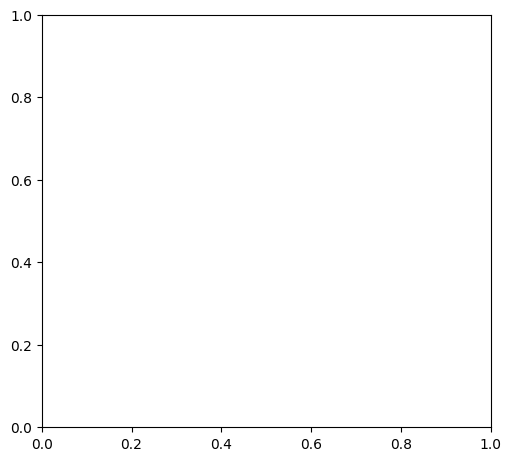

In [81]:

plot_z0_forNote(save=save_status, path='./plots-for-FCC-note/fastvsfullSimCLD-z0-leading-cpart.pdf')

In [ ]:


def format_CLDnc(value, tick_number):
    # Value is in radians, convert it to multiples of pi
    N = int(np.round(2 * value / np.pi))  # Multiples of pi/2
    if N == 0:
        return r"$0$"
    elif N == 1:
        return r"$\frac{\pi}{2}$"
    elif N == -1:
        return r"$-\frac{\pi}{2}$"
    elif N == 2:
        return r"$\pi$"
    elif N == -2:
        return r"$-\pi$"
    else:
        # Handle cases beyond -2*pi and 2*pi, though they might not appear
        return r"${0}\pi$".format(N/2 if N % 2 == 0 else f'{N}/2')

def plot_phirel_forNote(save=False, path=None):
    fig, ax = plt.subplots(1, 1, figsize=(5, 4.5), constrained_layout=True)
    
    bins=60
    r = {'pfcand_phirel': None}
    key = 'pfcand_phirel'
    a_list = get_chad_elements(df_IDEA[key], index_neutral_3E_IDEA)
    b_list = get_chad_elements(df_CLD[key], index_neutral_3E_CLD)

    ri = r[key] if r != None else None
    i = 0
        
    a = a_list[i]
    b = b_list[i]

    if ri == None:
        combined_min = min(a.min(), b.min())
        combined_max = max(a.max(), b.max())
        combined_range = (combined_min, combined_max)
    else:
        combined_range = ri
        # make overflow bins
        a = np.clip(a, *combined_range)
        b = np.clip(b, *combined_range)
    
    #ax.set_title("leading neutral hadronic jet constituents")
    ax.hist(a, bins=bins, histtype='step', linewidth=2.0, range=combined_range, label=f'FastSim', density=True)
    ax.hist(b, bins=bins, histtype='step', linewidth=2.0, range=combined_range, label=f'FullSim', density=True)
    ax.legend()
    ax.grid()
    ax.set_xlabel(r'$\phi_\mathrm{rel}$ (rad)')

    # Set ticks in factors of pi
    ax.xaxis.set_major_locator(MultipleLocator(base=np.pi / 2))  # Major ticks every pi/2
    ax.xaxis.set_minor_locator(MultipleLocator(base=np.pi / 4))  # Minor ticks every pi/4
    ax.xaxis.set_major_formatter(FuncFormatter(format_CLDnc))

    #plt.tight_layout()
    if save:
        if path==None:
            path = './plots-for-FCC-note/fastvsfullSimCLD-relphi-leading-nhad.pdf'
        plt.savefig(path)
    plt.show()

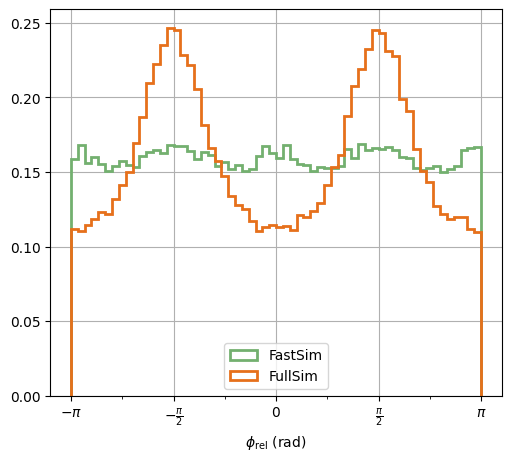

In [ ]:
plot_phirel_forNote(save=save_status)

Look at multiplicities once again

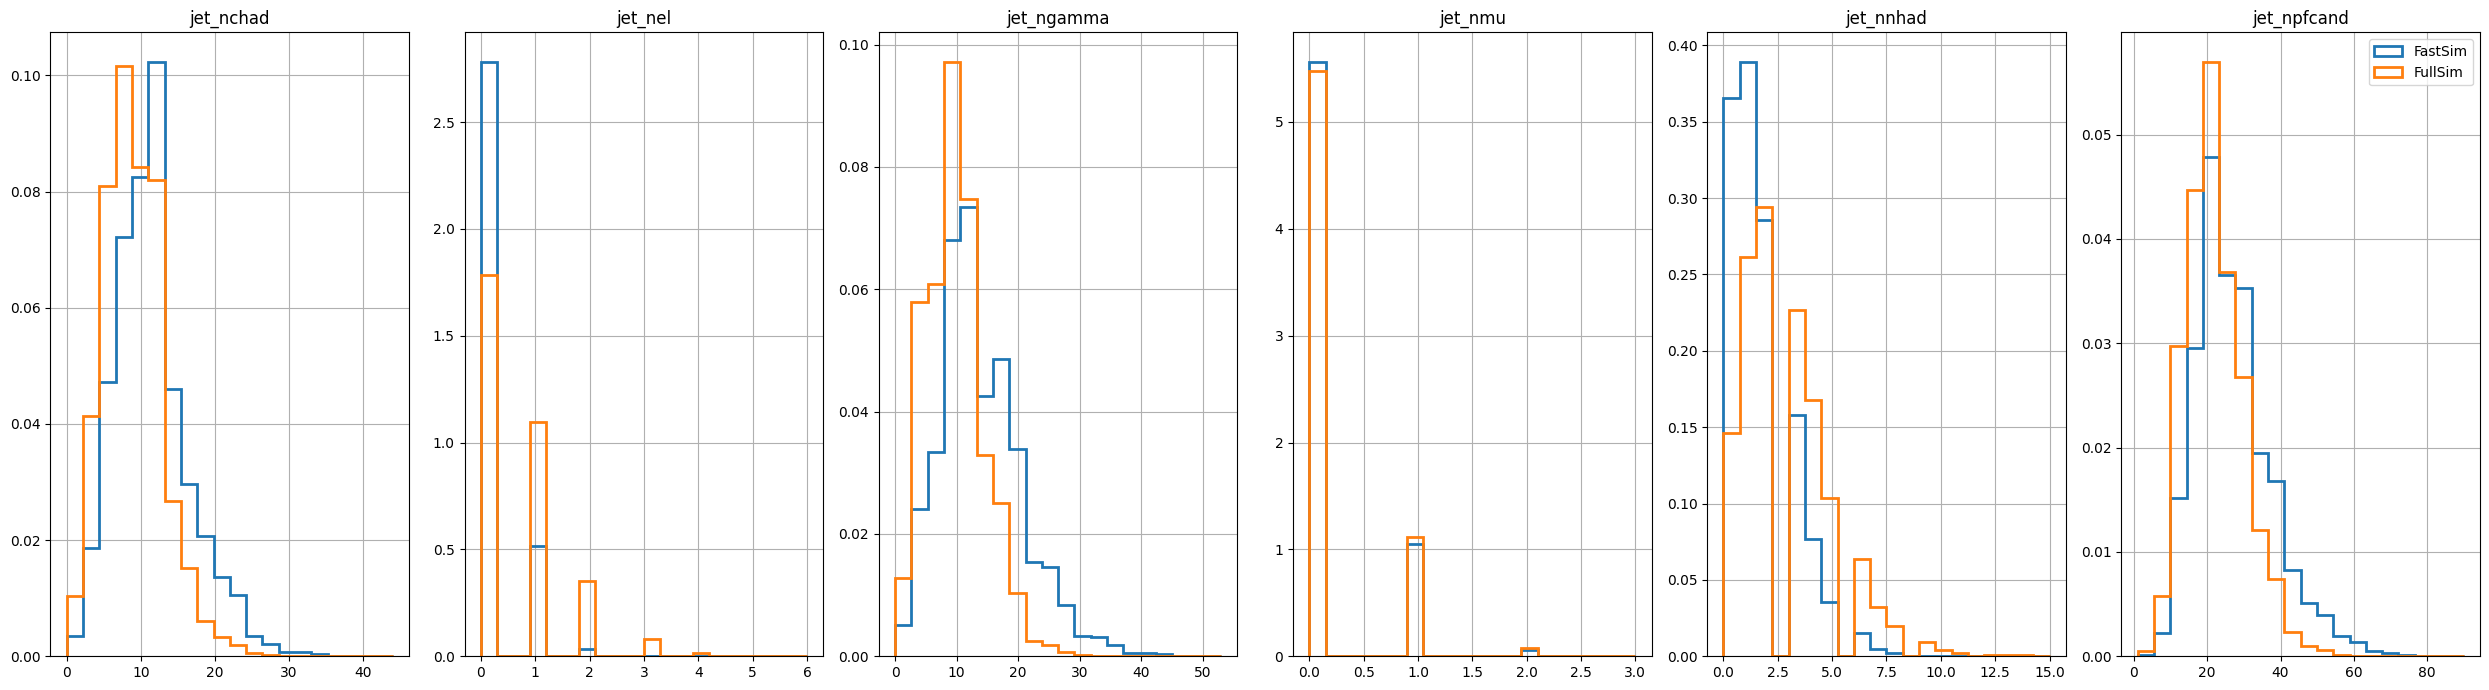

In [ ]:
keys = ['jet_nchad',
 #'jet_nconst',
 'jet_nel',
 'jet_ngamma',
 'jet_nmu',
 'jet_nnhad',
 'jet_npfcand']

histograms(keys, 1, 6, figsize=(25, 7), bins=20, save=save_status, path='./hist-Hbb-15k/jet_multiplicities.pdf')